## Step 2: Load and Preprocess the Dataset  
In this step, we will load the new dataset data_csv.csv, simulate prescription dates and durations, and prepare the data for clustering.

In [39]:
def load_and_preprocess_data(file_path, random_seed=123):
    """
    Loads and preprocesses the dataset by:
    1. Loading the CSV file
    2. Adding simulated prescription dates
    3. Adding simulated prescription durations
    4. Sorting by prescription date
    
    Parameters:
    -----------
    file_path : str
        Path to the CSV file
    random_seed : int, optional
        Seed for random number generation (default: 123)
        
    Returns:
    --------
    pandas.DataFrame
        Preprocessed dataframe with added columns
    """
    # Import required libraries
    import pandas as pd
    import numpy as np
    from datetime import datetime, timedelta
    
    # Set random seed for reproducibility
    np.random.seed(random_seed)
    
    # Load the dataset
    data = pd.read_csv(file_path)
    
    # Simulate prescription dates
    start_date = datetime(2020, 1, 1)
    end_date = datetime(2023, 1, 1)
    data['PrescriptionDate'] = [
        start_date + timedelta(days=np.random.randint(0, (end_date - start_date).days)) 
        for _ in range(len(data))
    ]
    
    # Simulate prescription durations (in days)
    data['Duration'] = np.random.randint(30, 90, size=len(data))  # Random durations between 30 and 90 days
    
    # Sort by prescription date
    data = data.sort_values(by=['PrescriptionDate'])
    
    return data

In [40]:
# Call the function
processed_data = load_and_preprocess_data('data_csv.csv')

# Display the first few rows to verify
print(processed_data.head())

# For full dataset output (like in your original code)
print(processed_data.to_string())

    LOCATION  TIME  PC_HEALTHXP  PC_GDP  USD_CAP FLAG_CODES  TOTAL_SPEND  \
221      FIN  1973       13.736   0.718   32.836        NaN       153.22   
793      SVK  2004       34.185   2.215  336.670        NaN      1808.69   
842      SWE  1975        8.560   0.560   41.610        NaN       340.89   
15       AUS  1986        9.568   0.599   89.940        NaN      1440.69   
526      JPN  2005       19.794   1.540  487.681        NaN     62312.46   

    PrescriptionDate  Duration  
221       2020-01-02        54  
793       2020-01-03        75  
842       2020-01-03        49  
15        2020-01-03        88  
526       2020-01-04        45  
     LOCATION  TIME  PC_HEALTHXP  PC_GDP   USD_CAP FLAG_CODES  TOTAL_SPEND PrescriptionDate  Duration
221       FIN  1973       13.736   0.718    32.836        NaN       153.22       2020-01-02        54
793       SVK  2004       34.185   2.215   336.670        NaN      1808.69       2020-01-03        75
842       SWE  1975        8.560   0.56

### Step 2.1: Exploratory Data Analysis (EDA)
In this step, we will perform exploratory data analysis to gain personal insights into the dataset. 

#### 2.1.1 Spending Volatility by Country

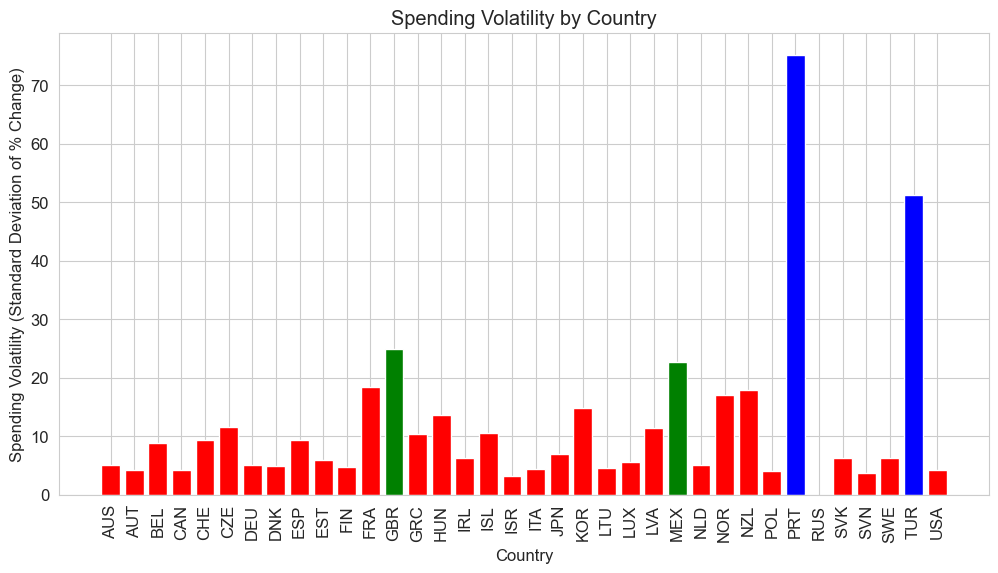

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_data(file_path):
    """
    Load dataset from a CSV file
    
    Parameters:
    file_path (str): Path to the CSV file
    
    Returns:
    pandas.DataFrame: Loaded dataframe
    """
    return pd.read_csv(file_path)

def compute_spending_change(dataframe):
    """
    Compute year-over-year percentage change in spending for each location
    
    Parameters:
    dataframe (pandas.DataFrame): Input dataframe with LOCATION and TOTAL_SPEND columns
    
    Returns:
    pandas.DataFrame: Dataframe with added SPENDING_CHANGE column
    """
    df_copy = dataframe.copy()
    df_copy["SPENDING_CHANGE"] = df_copy.groupby("LOCATION")["TOTAL_SPEND"].pct_change() * 100
    return df_copy

def compute_spending_volatility(dataframe):
    """
    Compute spending volatility (standard deviation of percentage change) by location
    
    Parameters:
    dataframe (pandas.DataFrame): Input dataframe with LOCATION and SPENDING_CHANGE columns
    
    Returns:
    pandas.DataFrame: Dataframe with LOCATION and SPENDING_VOLATILITY columns
    """
    volatility = dataframe.groupby("LOCATION")["SPENDING_CHANGE"].std().reset_index()
    volatility.columns = ["LOCATION", "SPENDING_VOLATILITY"]
    return volatility

def assign_colors(volatility_dataframe):
    """
    Assign colors based on volatility levels
    
    Parameters:
    volatility_dataframe (pandas.DataFrame): Dataframe with SPENDING_VOLATILITY column
    
    Returns:
    list: List of colors for each location
    """
    colors = []
    for value in volatility_dataframe["SPENDING_VOLATILITY"]:
        if value > 50:
            colors.append("blue")  # High volatility
        elif value > 20:
            colors.append("green")  # Medium volatility
        else:
            colors.append("red")  # Low volatility
    return colors

def plot_spending_volatility(volatility_dataframe, colors):
    """
    Plot spending volatility by country
    
    Parameters:
    volatility_dataframe (pandas.DataFrame): Dataframe with LOCATION and SPENDING_VOLATILITY columns
    colors (list): List of colors for each location
    
    Returns:
    matplotlib.figure.Figure: Figure object containing the plot
    """
    plt.figure(figsize=(12, 6))
    plt.bar(volatility_dataframe["LOCATION"], volatility_dataframe["SPENDING_VOLATILITY"], color=colors)
    plt.xticks(rotation=90)
    plt.xlabel("Country")
    plt.ylabel("Spending Volatility (Standard Deviation of % Change)")
    plt.title("Spending Volatility by Country")
    return plt.gcf()

def main(file_path="data_csv.csv"):
    """
    Main function to execute all steps and generate visualization
    
    Parameters:
    file_path (str): Path to the CSV file
    """
    # Load data
    df = load_data(file_path)
    
    # Step 1: Compute spending changes
    df_with_changes = compute_spending_change(df)
    
    # Step 2: Compute spending volatility
    spending_volatility = compute_spending_volatility(df_with_changes)
    
    # Step 3: Assign colors based on volatility
    colors = assign_colors(spending_volatility)
    
    # Plot the results
    fig = plot_spending_volatility(spending_volatility, colors)
    plt.show()
    
    return df_with_changes, spending_volatility, fig

# If this script is run directly, execute the main function
if __name__ == "__main__":
    df_with_changes, spending_volatility, fig = main()

#### 2.1.2 Pharmaceutical Spending Trends Over Time

C:\Users\siobh\AppData\Local\Temp\ipykernel_4008\1688444293.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_us = plt.cm.get_cmap('tab10', len(us_countries))


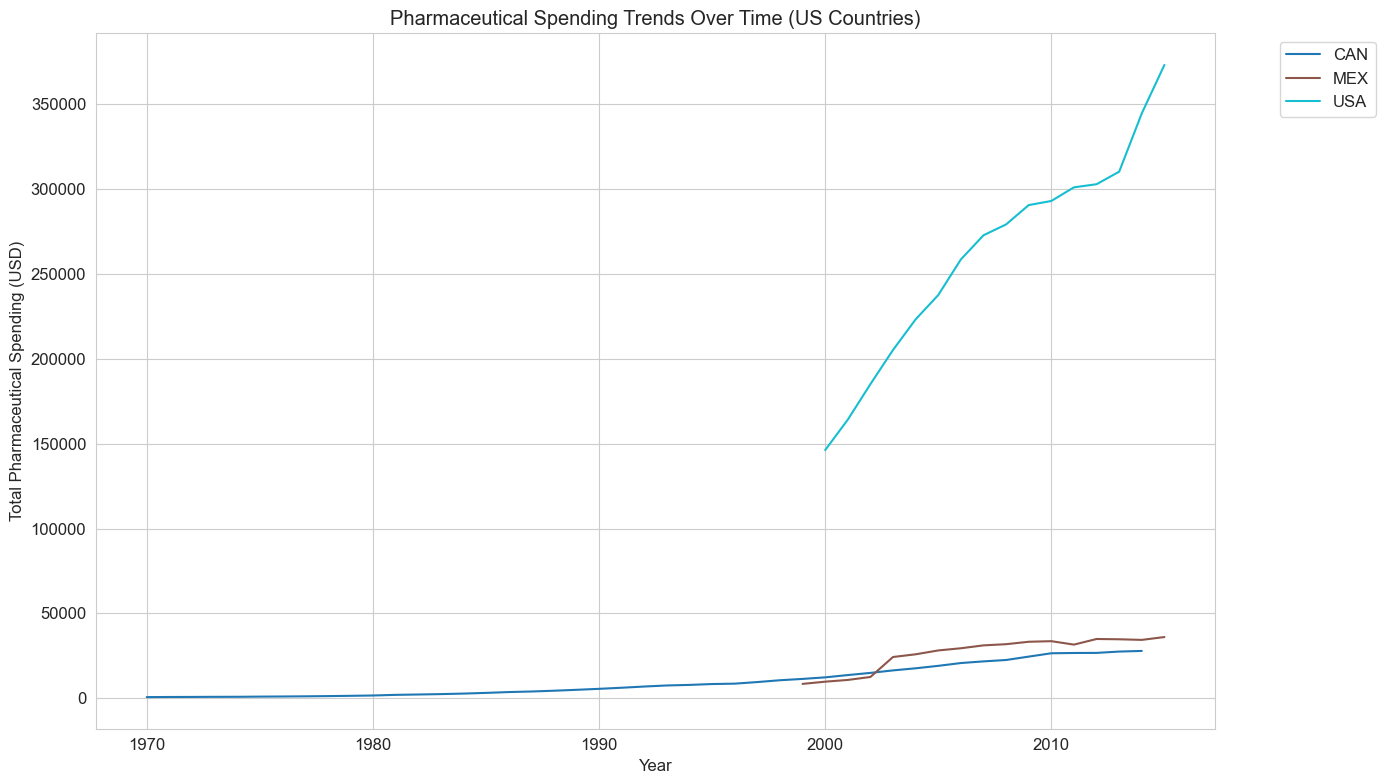

C:\Users\siobh\AppData\Local\Temp\ipykernel_4008\1688444293.py:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_europe = plt.cm.get_cmap('tab20', len(europe_countries))


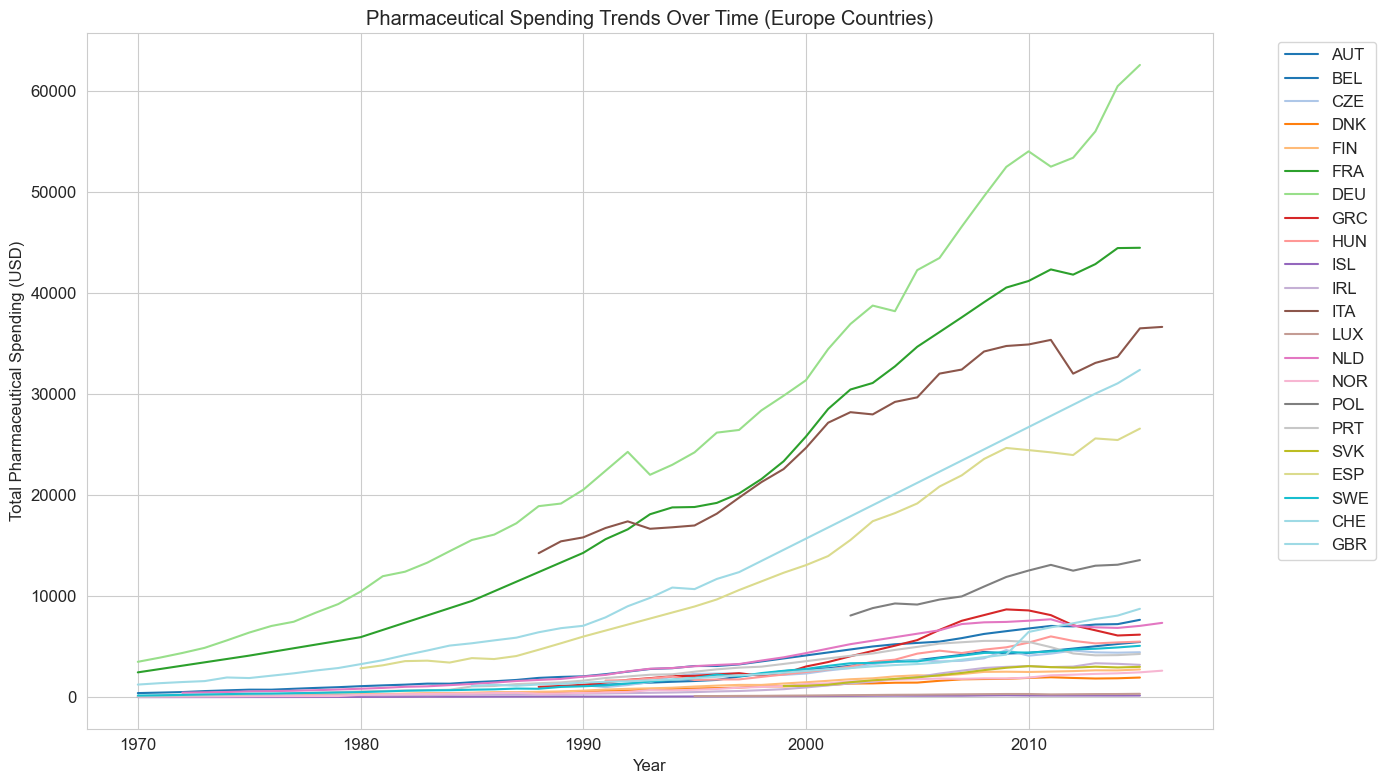

C:\Users\siobh\AppData\Local\Temp\ipykernel_4008\1688444293.py:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_asia = plt.cm.get_cmap('tab10', len(asia_countries))


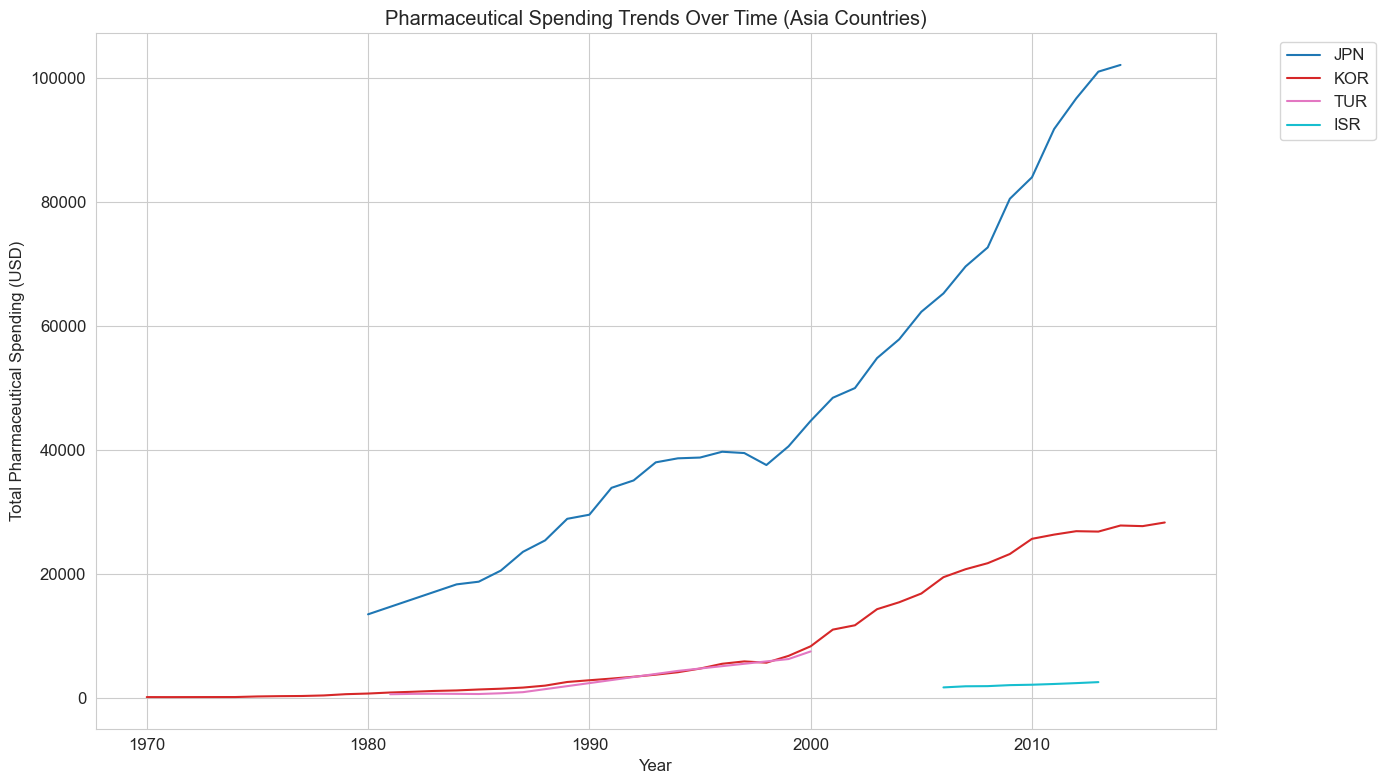

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_pharmaceutical_spending(data_path):
    """
    Analyze pharmaceutical spending trends for different country regions.
    
    Parameters:
    -----------
    data_path : str
        Path to the CSV file containing pharmaceutical spending data
        
    Returns:
    --------
    dict
        Dictionary containing the filtered DataFrames for each region
    """
    # Load dataset
    df = pd.read_csv(data_path)
    
    # Define country groups
    us_countries = ["USA", "CAN", "MEX"]
    europe_countries = ["AUT", "BEL", "CZE", "DNK", "FIN", "FRA", "DEU", "GRC", "HUN", 
                        "ISL", "IRL", "ITA", "LUX", "NLD", "NOR", "POL", "PRT", "SVK", 
                        "ESP", "SWE", "CHE", "GBR"]
    asia_countries = ["ISR", "JPN", "KOR", "TUR"]
    
    # Filter data for each region
    df_us = df[df["LOCATION"].isin(us_countries)]
    df_europe = df[df["LOCATION"].isin(europe_countries)]
    df_asia = df[df["LOCATION"].isin(asia_countries)]
    
    # Function to plot data for a region
    def plot_region(df_region, region_name, colors):
        plt.figure(figsize=(14, 8))
        countries = df_region["LOCATION"].unique()
        for i, country in enumerate(countries):
            country_data = df_region[df_region["LOCATION"] == country]
            plt.plot(country_data["TIME"], country_data["TOTAL_SPEND"], label=country, color=colors(i))
        plt.xlabel("Year")
        plt.ylabel("Total Pharmaceutical Spending (USD)")
        plt.title(f"Pharmaceutical Spending Trends Over Time ({region_name} Countries)")
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    
    # Plot US countries
    colors_us = plt.cm.get_cmap('tab10', len(us_countries))
    plot_region(df_us, "US", colors_us)
    
    # Plot Europe countries
    colors_europe = plt.cm.get_cmap('tab20', len(europe_countries))
    plot_region(df_europe, "Europe", colors_europe)
    
    # Plot Asia countries
    colors_asia = plt.cm.get_cmap('tab10', len(asia_countries))
    plot_region(df_asia, "Asia", colors_asia)
    
    # Return the filtered dataframes for potential further analysis
    return {
        "US": df_us,
        "Europe": df_europe,
        "Asia": df_asia
    }

# Example usage
if __name__ == "__main__":
    # Call the function with the path to your data
    region_data = analyze_pharmaceutical_spending("data_csv.csv")

---

## Step 3: Apply the SEE Algorithm (K-Means Clustering) 

In [ ]:
# SEE.R converted to Python for specific data structure
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.spatial.distance import cdist
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

# Function to calculate within-cluster variance (from your original SESSA code)
def within_cluster_variance(X, labels, centroids):
    variance = 0
    for i, centroid in enumerate(centroids):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            variance += np.sum(cdist(cluster_points, [centroid], 'sqeuclidean'))
    return variance / len(X)

# Enhanced SESSA function with adaptive alpha (from your original code)
def calculate_sessa(X, labels, centroids, alpha=0.1, cluster_count=None):
    """
    Calculate SESSA (Silhouette-Enhanced Self-Adjusting) score
    
    Parameters:
    -----------
    X : array-like
        Input data
    labels : array-like
        Cluster labels
    centroids : array-like
        Cluster centroids
    alpha : float
        Weight parameter for within-cluster variance
    cluster_count : int
        Number of clusters (used for adaptive alpha)
        
    Returns:
    --------
    sessa_score : float
        The calculated SESSA score
    silhouette : float
        Silhouette score component
    wcv : float
        Within-cluster variance component
    """
    # Calculate silhouette score (cohesion and separation metric)
    silhouette = silhouette_score(X, labels)
    
    # Calculate within-cluster variance (compactness metric)
    wcv = within_cluster_variance(X, labels, centroids)
    
    # Adaptive alpha: as cluster number increases, we penalize complexity more
    if cluster_count is not None:
        # Adjust alpha linearly with cluster count (higher clusters = higher alpha)
        adaptive_alpha = alpha * (1 + (cluster_count - 2) * 0.05)
    else:
        adaptive_alpha = alpha
    
    # Final SESSA score calculation
    sessa_score = silhouette - adaptive_alpha * wcv
    
    return sessa_score, silhouette, wcv

# Main SEE function adapted to work with your data structure
def See(data, features=['TIME', 'TOTAL_SPEND']):
    """
    Sequential Event Estimation function adapted for the specific data structure
    
    Parameters:
    -----------
    data : DataFrame
        Data with columns like LOCATION, TIME, TOTAL_SPEND, etc.
    features : list
        List of features to use for clustering
        
    Returns:
    --------
    DataFrame
        Enhanced data with cluster information and visualizations
    """
    print(f"Starting SEE analysis using features: {features}")
    
    # Ensure we have a copy to work with
    X = data[features].values
    
    # Check for any missing values
    if np.isnan(X).any():
        print("Warning: Data contains missing values. Handling them...")
        # Simple imputation by column means
        for col_idx in range(X.shape[1]):
            col_mean = np.nanmean(X[:, col_idx])
            X[np.isnan(X[:, col_idx]), col_idx] = col_mean
    
    # Calculate metrics for different values of k
    k_range = range(2, 11)
    sessa_scores = []
    silhouette_scores = []
    wcv_scores = []
    adaptive_alphas = []

    # Create dataframe to store all metrics
    metrics_df = pd.DataFrame(columns=['k', 'SESSA', 'Silhouette', 'WCV', 'Adaptive_Alpha'])

    for k in k_range:
        # Fit K-Means
        kmeans = KMeans(n_clusters=k, random_state=1234, n_init=10)
        kmeans.fit(X)
        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_
        
        # Calculate adaptive alpha
        adaptive_alpha = 0.1 * (1 + (k - 2) * 0.05)
        
        # Calculate SESSA with all components
        sessa_score, silhouette, wcv = calculate_sessa(X, labels, centroids, alpha=0.1, cluster_count=k)
        
        # Store scores
        sessa_scores.append(sessa_score)
        silhouette_scores.append(silhouette)
        wcv_scores.append(wcv)
        adaptive_alphas.append(adaptive_alpha)
        
        # Add to metrics dataframe
        metrics_df = metrics_df._append({
            'k': k,
            'SESSA': sessa_score,
            'Silhouette': silhouette,
            'WCV': wcv,
            'Adaptive_Alpha': adaptive_alpha
        }, ignore_index=True)

    # Find optimal k
    optimal_k = k_range[np.argmax(sessa_scores)]
    print(f"Optimal number of clusters based on SESSA: {optimal_k}")

    # Create visualizations
    fig = plt.figure(figsize=(16, 12))

    # 1. SESSA Score plot
    ax1 = fig.add_subplot(2, 2, 1)
    ax1.plot(k_range, sessa_scores, marker='o', linestyle='-', linewidth=2, markersize=10, color='#1f77b4')
    ax1.axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, label=f'Optimal k={optimal_k}')
    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('SESSA Score')
    ax1.set_title('SESSA Score vs. Number of Clusters')
    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.7)

    # 2. Component comparison plot
    ax2 = fig.add_subplot(2, 2, 2)
    ax2.plot(k_range, silhouette_scores, marker='s', linestyle='-', linewidth=2, markersize=8, 
             color='green', label='Silhouette Score')
    ax2.plot(k_range, wcv_scores, marker='^', linestyle='-', linewidth=2, markersize=8, 
             color='orange', label='Within-Cluster Variance')
    ax2.plot(k_range, adaptive_alphas, marker='*', linestyle='--', linewidth=2, markersize=8, 
             color='purple', label='Adaptive Alpha')
    ax2.set_xlabel('Number of Clusters (k)')
    ax2.set_ylabel('Score')
    ax2.set_title('Component Scores vs. Number of Clusters')
    ax2.legend()
    ax2.grid(True, linestyle='--', alpha=0.7)

    # Final clustering with optimal k
    kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=1234)
    labels_optimal = kmeans_optimal.fit_predict(X)
    centroids_optimal = kmeans_optimal.cluster_centers_

    # 3. Clustered data visualization
    ax3 = fig.add_subplot(2, 2, 3)
    colors = plt.cm.viridis(np.linspace(0, 1, optimal_k))

    for i in range(optimal_k):
        cluster_points = X[labels_optimal == i]
        ax3.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, color=colors[i], 
                   alpha=0.7, label=f'Cluster {i}')

    ax3.scatter(centroids_optimal[:, 0], centroids_optimal[:, 1], s=200, marker='X', 
               color='red', label='Centroids')
    ax3.set_xlabel(features[0])
    ax3.set_ylabel(features[1])
    ax3.set_title(f'Optimal Clustering (k={optimal_k})')
    ax3.legend(loc='upper right')
    ax3.grid(True, linestyle='--', alpha=0.7)

    # 4. Metrics table
    ax4 = fig.add_subplot(2, 2, 4)
    ax4.axis('off')
    table_data = [
        ['k', 'SESSA', 'Silhouette', 'WCV', 'Alpha'],
    ]
    for _, row in metrics_df.iterrows():
        table_data.append([
            f"{row['k']:.0f}",
            f"{row['SESSA']:.4f}",
            f"{row['Silhouette']:.4f}",
            f"{row['WCV']:.4f}",
            f"{row['Adaptive_Alpha']:.4f}"
        ])

    table = ax4.table(cellText=table_data, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)
    ax4.set_title('Clustering Metrics Comparison')

    plt.tight_layout()
    plt.savefig('sessa_analysis.png', dpi=300, bbox_inches='tight')
    
    # Create silhouette plot for optimal k
    silhouette_vals = silhouette_samples(X, labels_optimal)
    
    plt.figure(figsize=(10, 7))
    y_ticks = []
    y_lower, y_upper = 0, 0

    for i in range(optimal_k):
        cluster_silhouette_vals = silhouette_vals[labels_optimal == i]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        
        color = colors[i]
        plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, 
                 height=1.0, edgecolor='none', color=color, alpha=0.7)
        
        y_ticks.append((y_lower + y_upper) / 2)
        y_lower += len(cluster_silhouette_vals)

    plt.axvline(x=np.mean(silhouette_vals), color='red', linestyle='--')
    plt.yticks(y_ticks, [f'Cluster {i}' for i in range(optimal_k)])
    plt.xlabel('Silhouette Coefficient')
    plt.ylabel('Cluster')
    plt.title('Silhouette Analysis for Optimal Clustering')
    plt.tight_layout()
    plt.savefig('silhouette_analysis.png', dpi=300, bbox_inches='tight')
    
    # Additional analysis: Cluster sizes and distribution
    cluster_sizes = np.bincount(labels_optimal)
    print("\nCluster size distribution:")
    for i in range(optimal_k):
        print(f"Cluster {i}: {cluster_sizes[i]} points ({cluster_sizes[i]/len(X)*100:.1f}%)")

    # Create a report dataframe with cluster statistics
    cluster_stats = pd.DataFrame(index=range(optimal_k))
    cluster_stats['Size'] = cluster_sizes
    cluster_stats['Percentage'] = (cluster_sizes / len(X) * 100).round(1)
    
    for f_idx, feature in enumerate(features):
        cluster_stats[f'Avg_{feature}'] = [X[labels_optimal == i, f_idx].mean() for i in range(optimal_k)]
        cluster_stats[f'Std_{feature}'] = [X[labels_optimal == i, f_idx].std() for i in range(optimal_k)]
        cluster_stats[f'Min_{feature}'] = [X[labels_optimal == i, f_idx].min() for i in range(optimal_k)]
        cluster_stats[f'Max_{feature}'] = [X[labels_optimal == i, f_idx].max() for i in range(optimal_k)]

    # Calculate average silhouette score per cluster
    cluster_stats['Avg_Silhouette'] = [silhouette_vals[labels_optimal == i].mean() for i in range(optimal_k)]

    print("\nCluster Statistics:")
    print(cluster_stats)

    # Add cluster labels to original data
    data_enhanced = data.copy()
    data_enhanced['SEE_Cluster'] = labels_optimal
    
    # Return the output as a dictionary
    return {
        'optimal_k': optimal_k,
        'kmeans_model': kmeans_optimal,
        'labels': labels_optimal,
        'centroids': centroids_optimal,
        'sessa_score': max(sessa_scores),
        'enhanced_data': data_enhanced,
        'cluster_stats': cluster_stats,
        'metrics': metrics_df
    }

# Main execution code
def run_see_analysis(data_file='data_csv.csv', features=['TIME', 'TOTAL_SPEND']):
    """
    Run the SEE analysis on the specified data file
    
    Parameters:
    -----------
    data_file : str
        Path to the CSV data file
    features : list
        List of features to use for clustering
    """
    try:
        # Load the data
        print(f"Loading data from {data_file}...")
        data = pd.read_csv(data_file)
        print(f"Data loaded successfully with {data.shape[0]} rows and {data.shape[1]} columns")
        
        # Display column names to verify
        print("Available columns:", data.columns.tolist())
        
        # Verify that the required features exist
        missing_features = [f for f in features if f not in data.columns]
        if missing_features:
            print(f"Warning: The following features are missing from the data: {missing_features}")
            # Ask for alternative features
            valid_features = [f for f in features if f in data.columns]
            features = valid_features
            
        # Check data types and convert if necessary
        for feature in features:
            if data[feature].dtype == 'object':
                try:
                    data[feature] = pd.to_numeric(data[feature])
                    print(f"Converted {feature} to numeric type")
                except:
                    print(f"Warning: Could not convert {feature} to numeric, this may cause issues")
        
        # Run the SEE analysis
        result = See(data, features)
        
        # Print summary of results
        print("\nSummary of SEE Analysis:")
        print(f"Optimal number of clusters: {result['optimal_k']}")
        print(f"Best SESSA score: {result['sessa_score']:.4f}")
        
        # Display cluster statistics
        print("\nCluster Statistics:")
        print(result['cluster_stats'])
        
        # Save the enhanced data
        enhanced_file = 'enhanced_' + data_file
        result['enhanced_data'].to_csv(enhanced_file, index=False)
        print(f"\nEnhanced data saved to {enhanced_file}")
        
        print("\nAnalysis complete! Visualizations saved as 'sessa_analysis.png' and 'silhouette_analysis.png'")
        
        return result
        
    except Exception as e:
        print(f"Error during analysis: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

# Example usage in Jupyter notebook:
if __name__ == "__main__":
    # You would run this in your notebook:
    # result = run_see_analysis()
    
    # Optionally use different features:
    # result = run_see_analysis(features=['PC_HEALTHXP', 'PC_GDP'])
    
    # To analyze all possible feature pairs:
    # import itertools
    # all_features = ['TIME', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']
    # feature_pairs = list(itertools.combinations(all_features, 2))
    # for pair in feature_pairs:
    #     print(f"\nAnalyzing feature pair: {pair}")
    #     run_see_analysis(features=list(pair))
    
    print("SEE K-means module loaded successfully!")

SEE K-means module loaded successfully!
Use the see_analysis() function to run Sequential Event Estimation


Loading data from data_csv.csv...
Data loaded successfully with 1036 rows and 7 columns
Available columns: ['LOCATION', 'TIME', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'FLAG_CODES', 'TOTAL_SPEND']
Starting SEE analysis using features: ['TIME', 'TOTAL_SPEND']
Optimal number of clusters based on SESSA: 10

Cluster size distribution:
Cluster 0: 632 points (61.0%)
Cluster 1: 8 points (0.8%)
Cluster 2: 64 points (6.2%)
Cluster 3: 7 points (0.7%)
Cluster 4: 5 points (0.5%)
Cluster 5: 16 points (1.5%)
Cluster 6: 2 points (0.2%)
Cluster 7: 72 points (6.9%)
Cluster 8: 184 points (17.8%)
Cluster 9: 46 points (4.4%)

Cluster Statistics:
   Size  Percentage     Avg_TIME   Std_TIME  Min_TIME  Max_TIME  \
0   632        61.0  1992.881329  12.480878    1970.0    2016.0   
1     8         0.8  2009.500000   2.291288    2006.0    2013.0   
2    64         6.2  2004.890625   7.479382    1987.0    2016.0   
3     7         0.7  2009.857143   4.323642    2000.0    2014.0   
4     5         0.5  2003.000000   

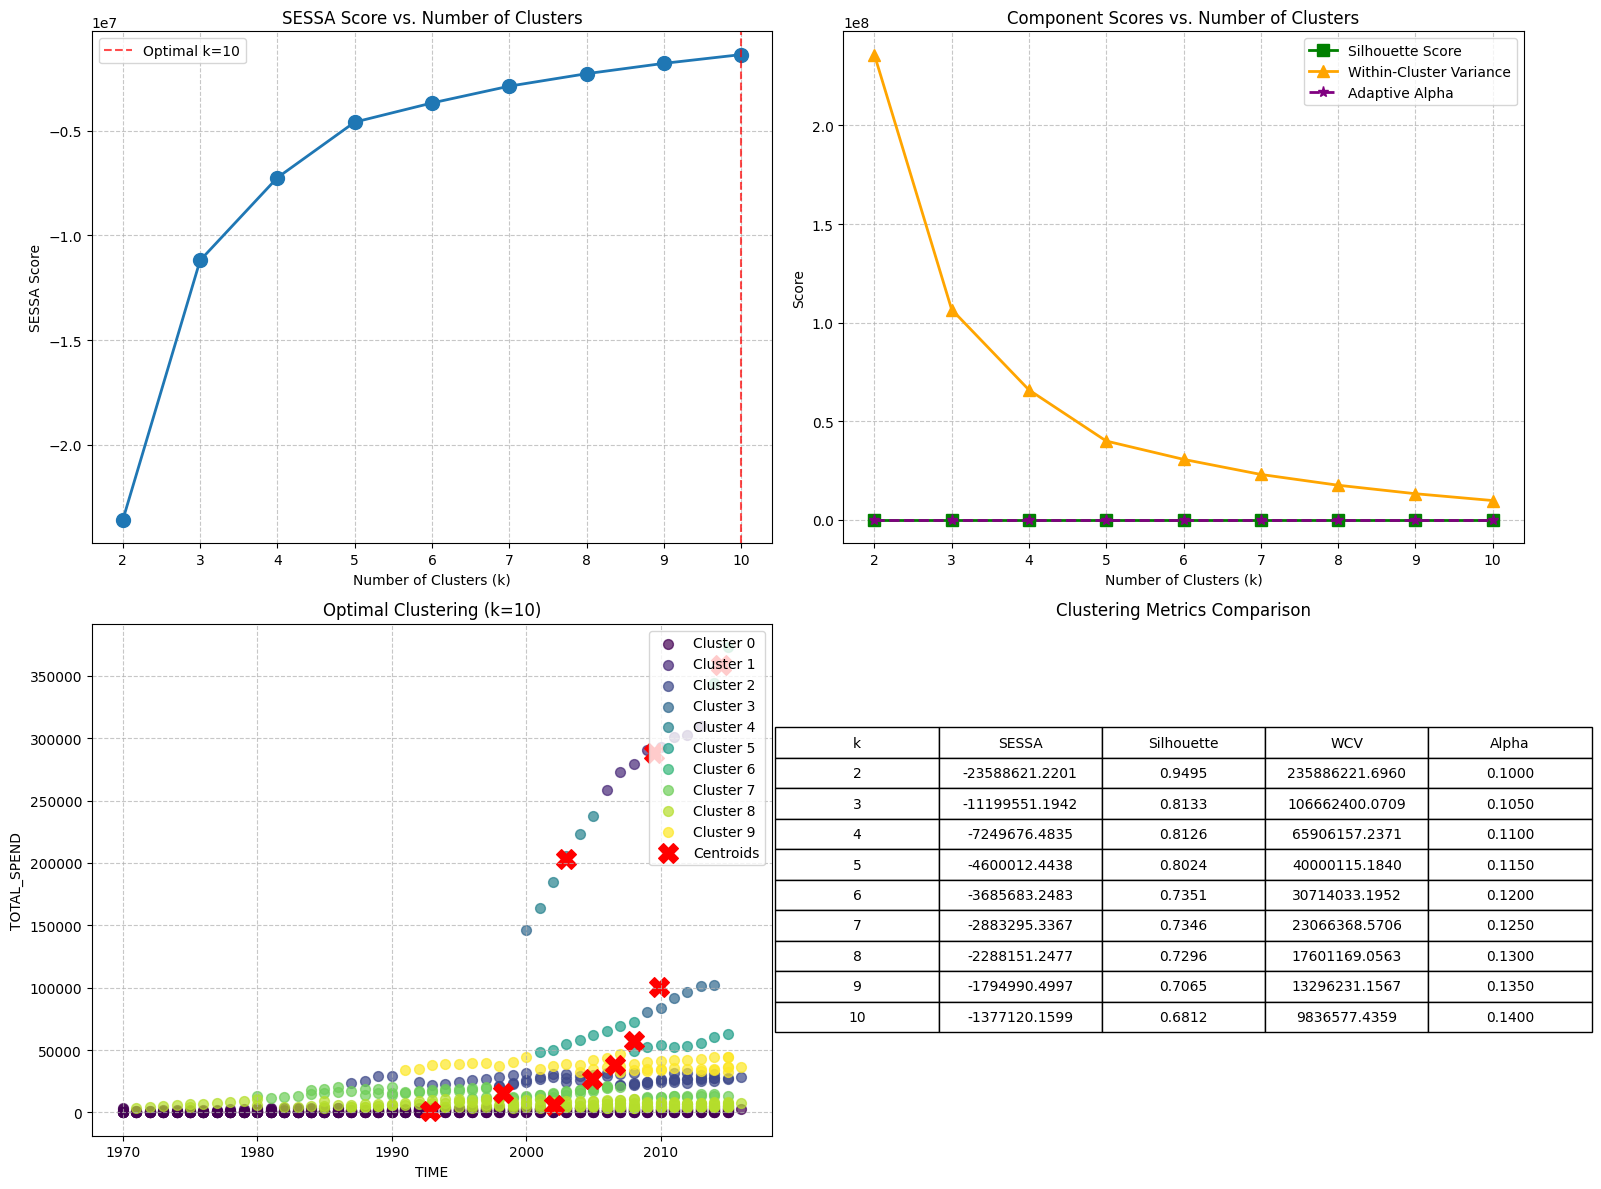

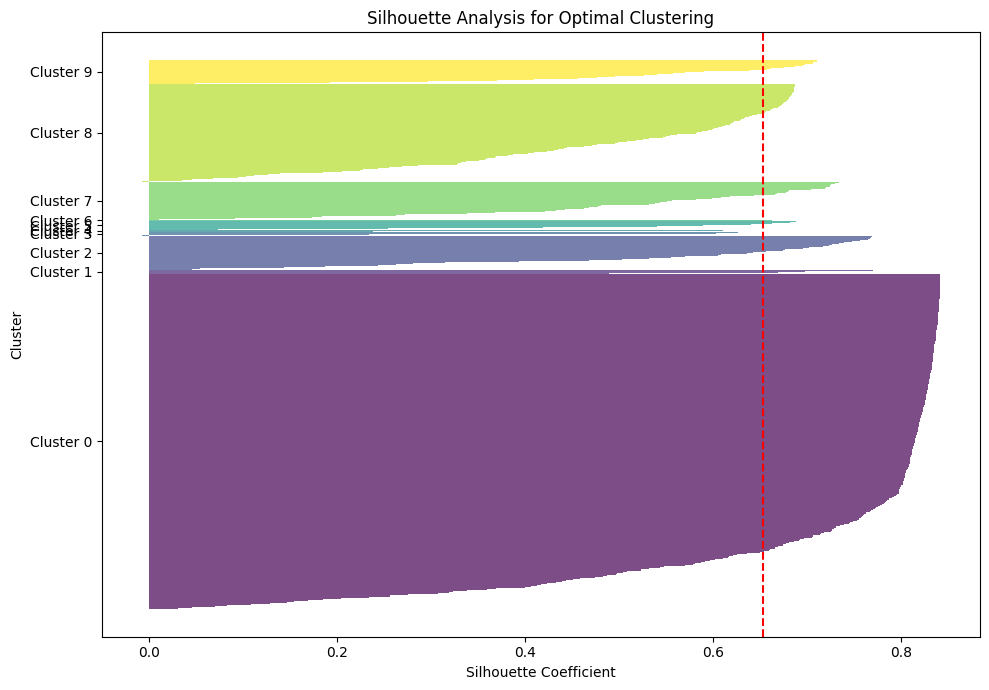

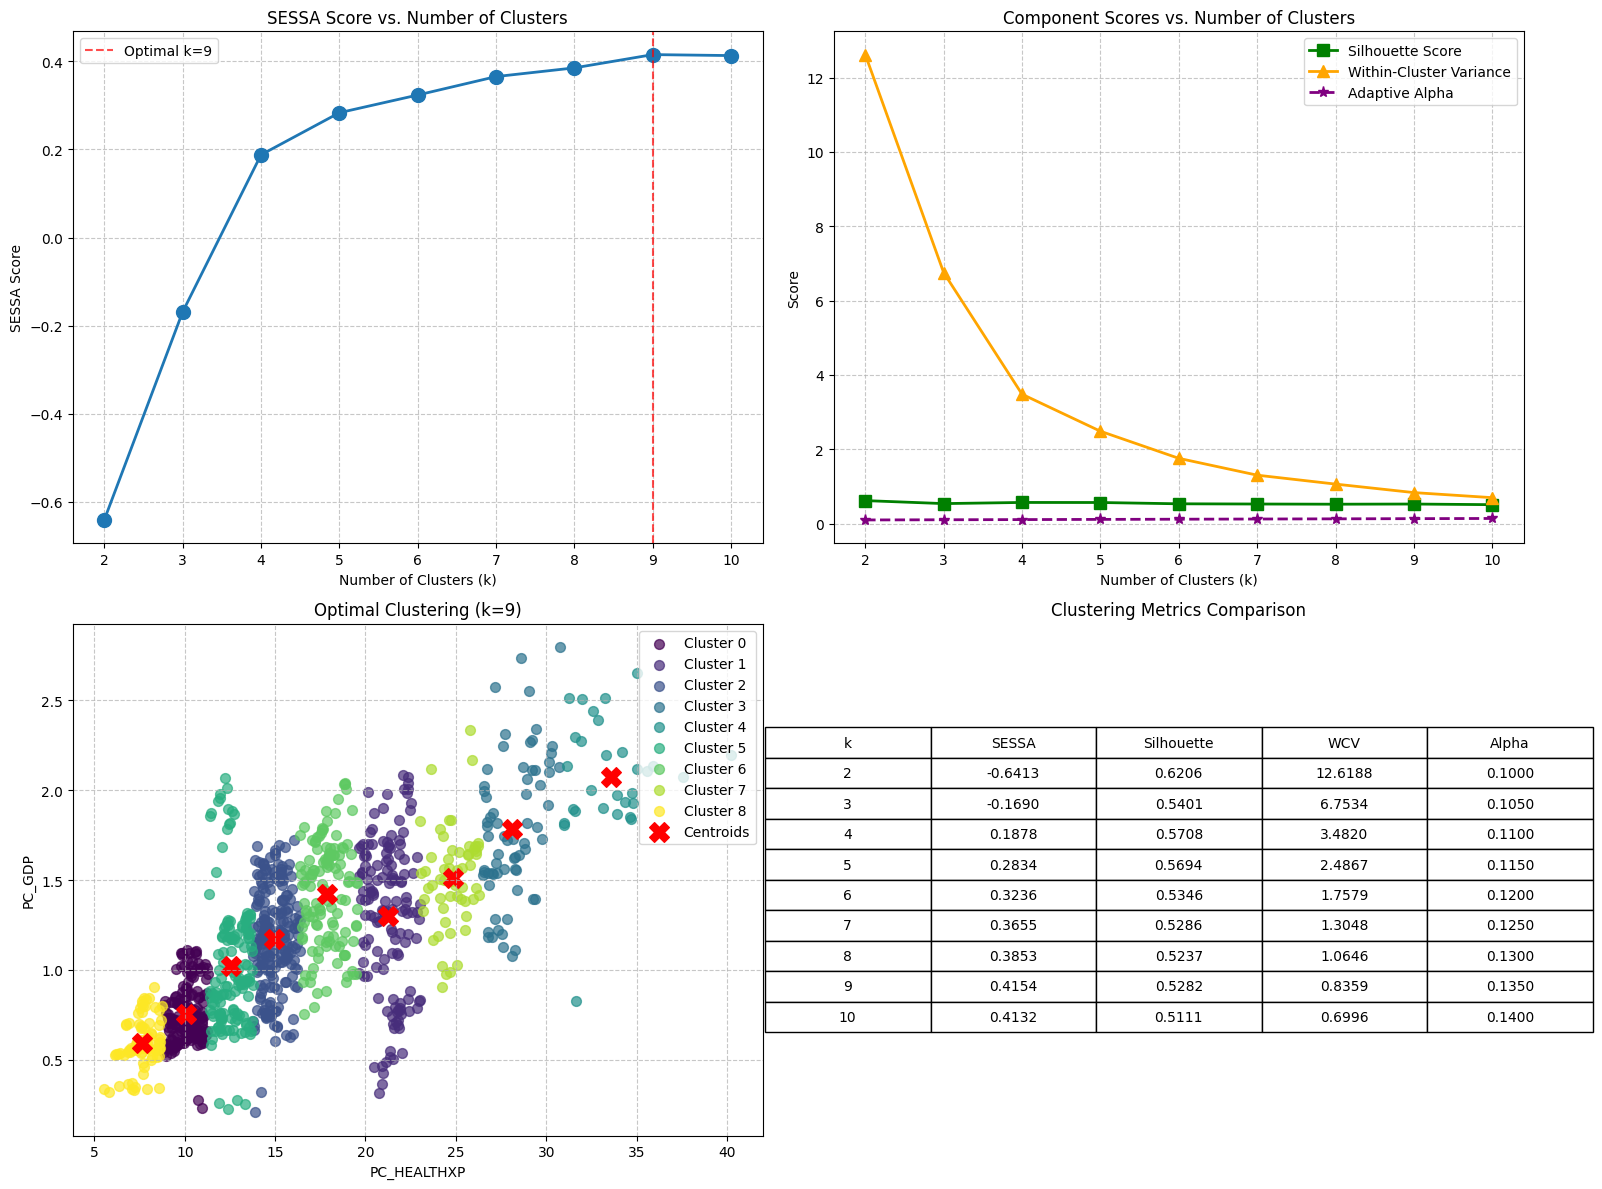

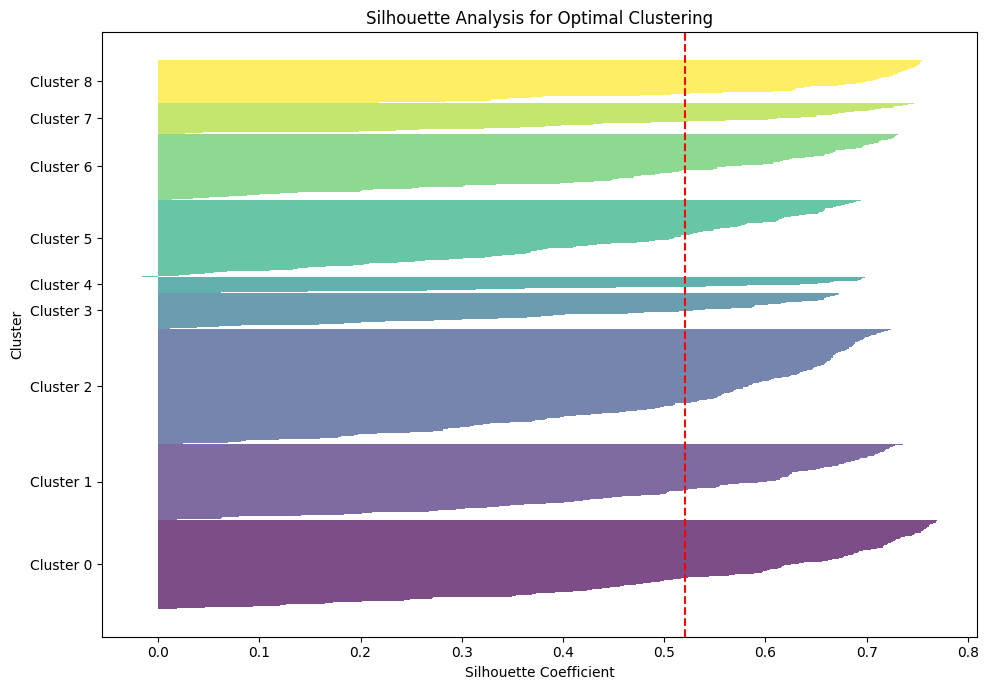

In [4]:
from see_kmeans import run_see_analysis

# Run with default features (TIME and TOTAL_SPEND)
result = run_see_analysis('data_csv.csv')

# Or specify different features
result = run_see_analysis('data_csv.csv', features=['PC_HEALTHXP', 'PC_GDP'])

# Access the results
optimal_k = result['optimal_k']
enhanced_data = result['enhanced_data']
cluster_stats = result['cluster_stats']

---

## Step 4: Substituting K-Means
We will use GMM and DBSCAN clustering and compare the results with K-Means.

### 4.1 Gaussian Mixture Model Clustering


Cluster Statistics:
              TOTAL_SPEND                     PC_HEALTHXP                
                     mean           std count        mean       std count
Cluster_GMM                                                              
0            29655.554585  55518.242715   349   16.883083  2.794389   349
1             5109.642076   7931.298025   236   25.597504  4.333965   236
2             1404.244501   1553.794762   451   11.227776  2.584856   451


C:\Users\siobh\AppData\Local\Temp\ipykernel_4008\311109063.py:134: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('viridis', n_components),


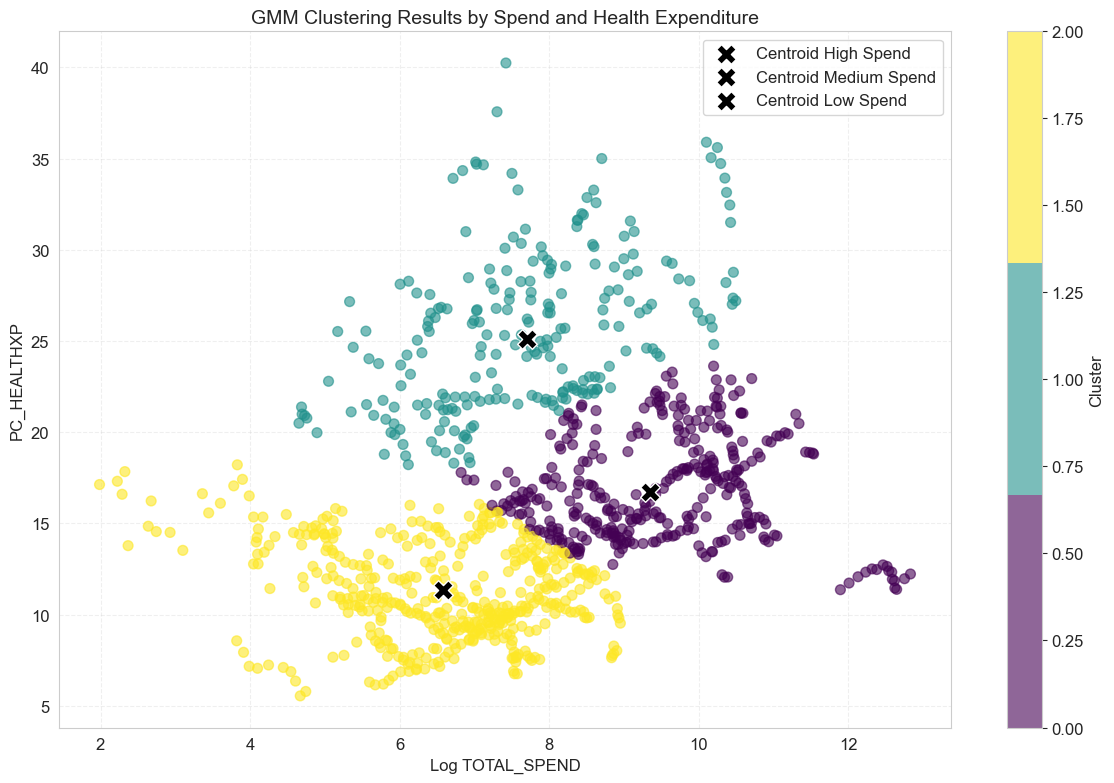

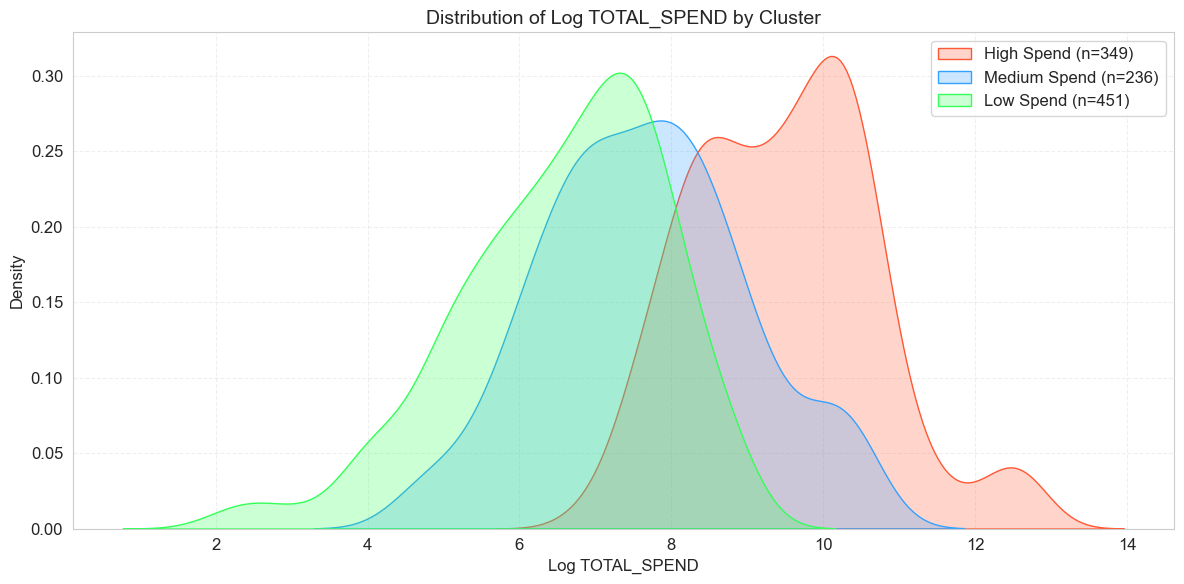

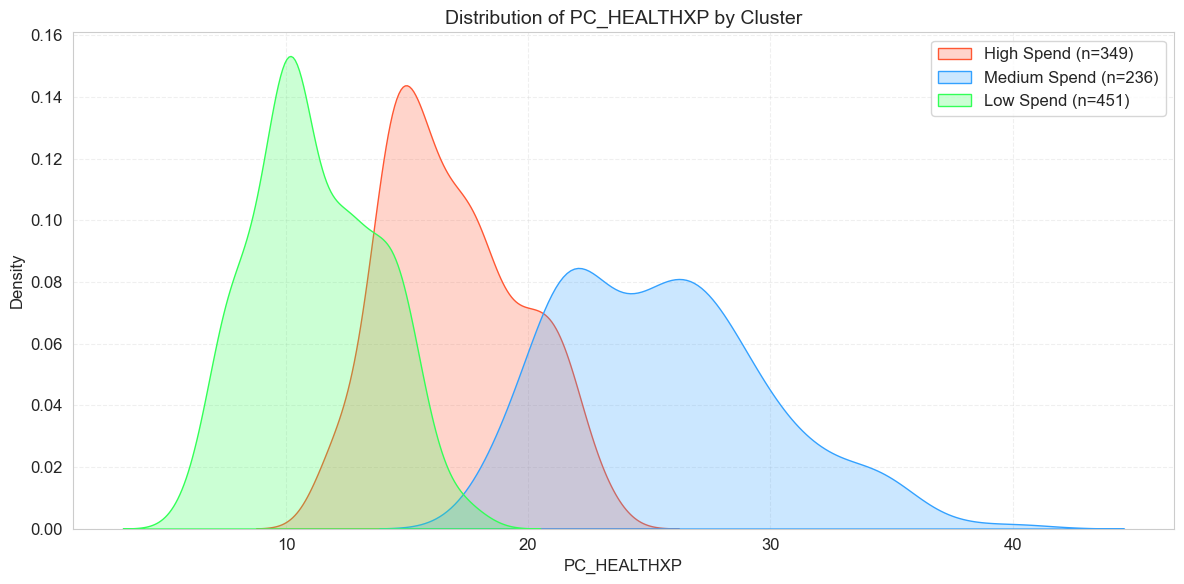

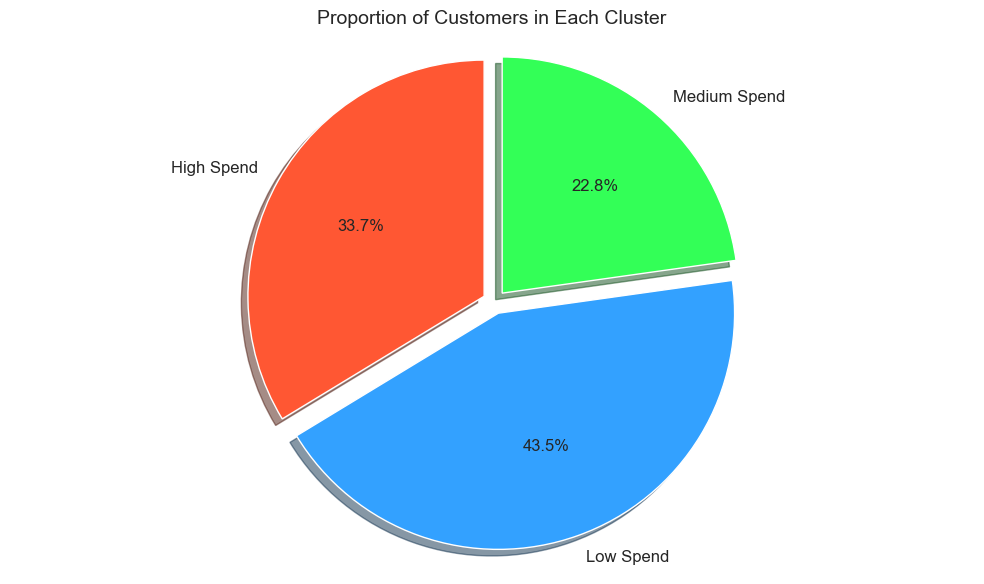


GMM Model Parameters:
Means: [[ 0.84651675  0.04757186]
 [-0.05015954  1.36481809]
 [-0.66518139 -0.79423834]]
Weights: [0.3451028  0.23330899 0.42158821]

Cluster Interpretation:
Cluster 2 (Low Spend):
  Average TOTAL_SPEND: $1404.24
  Average PC_HEALTHXP: 11.23%
  Number of customers: 451

Cluster 1 (Medium Spend):
  Average TOTAL_SPEND: $5109.64
  Average PC_HEALTHXP: 25.60%
  Number of customers: 236

Cluster 0 (High Spend):
  Average TOTAL_SPEND: $29655.55
  Average PC_HEALTHXP: 16.88%
  Number of customers: 349



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def perform_gmm_clustering(
    file_path, 
    spend_column='TOTAL_SPEND', 
    health_column='PC_HEALTHXP', 
    n_components=3, 
    random_state=1234,
    output_folder='./'
):
    """
    Perform Gaussian Mixture Model clustering on customer data.
    
    Parameters:
    -----------
    file_path : str
        Path to the CSV file containing the data
    spend_column : str
        Name of the column representing total spend
    health_column : str
        Name of the column representing health expenditure percentage
    n_components : int
        Number of clusters for GMM
    random_state : int
        Random seed for reproducibility
    output_folder : str
        Folder to save the output files
        
    Returns:
    --------
    data : pandas DataFrame
        Original data with cluster assignments and probabilities
    gmm : GaussianMixture
        Fitted GMM model
    mapping : dict
        Mapping between cluster numbers and descriptive labels
    """
    # Load dataset
    data = pd.read_csv(file_path)
    
    # Check if required columns exist
    required_columns = [spend_column, health_column]
    for col in required_columns:
        if col not in data.columns:
            raise KeyError(f"The column '{col}' is not found in the dataset. Check column names.")
    
    # Log transformation to handle skewness in spend column
    data[f'Log_{spend_column}'] = np.log1p(data[spend_column])  # log(1 + x) to handle zeros
    
    # Prepare data for clustering (using both features)
    X_gmm = data[[f'Log_{spend_column}', health_column]]
    
    # Standardize data - important for GMM to work properly with mixed features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_gmm)
    
    # Apply Gaussian Mixture Model
    gmm = GaussianMixture(
        n_components=n_components, 
        random_state=random_state,
        covariance_type='full',  # Using full covariance for better flexibility
        max_iter=100,
        n_init=10  # Multiple initializations to find the best fit
    )
    
    # Fit the model and get cluster assignments
    data['Cluster_GMM'] = gmm.fit_predict(X_scaled)
    
    # Extract cluster probabilities
    cluster_probs = gmm.predict_proba(X_scaled)
    for i in range(n_components):
        data[f'Prob_Cluster_{i}'] = cluster_probs[:, i]
    
    # Calculate and print cluster statistics
    print("\nCluster Statistics:")
    cluster_stats = data.groupby('Cluster_GMM')[[spend_column, health_column]].agg(['mean', 'std', 'count'])
    print(cluster_stats)
    
    # Create a more meaningful cluster interpretation
    cluster_labels = {
        0: "Low Spend",
        1: "Medium Spend",
        2: "High Spend"
    }
    
    # Map numeric clusters to descriptive labels
    # Sort by mean spend to ensure consistent labeling
    sorted_clusters = data.groupby('Cluster_GMM')[spend_column].mean().sort_values().index
    mapping = {cluster: label for cluster, label in zip(sorted_clusters, cluster_labels.values())}
    data['Cluster_Label'] = data['Cluster_GMM'].map(mapping)
    
    # Return the dataframe with cluster assignments, the model, and the mapping
    return data, gmm, mapping, scaler

def visualize_gmm_results(data, gmm, mapping, scaler, n_components=3, spend_column='TOTAL_SPEND', health_column='PC_HEALTHXP', output_folder='./'):
    """
    Create visualizations for GMM clustering results.
    
    Parameters:
    -----------
    data : pandas DataFrame
        Data with cluster assignments
    gmm : GaussianMixture
        Fitted GMM model
    mapping : dict
        Mapping between cluster numbers and descriptive labels
    scaler : StandardScaler
        Fitted scaler used for standardization
    n_components : int
        Number of clusters
    spend_column : str
        Name of the column representing total spend
    health_column : str
        Name of the column representing health expenditure percentage
    output_folder : str
        Folder to save the output files
    """
    # Define colors
    colors = ['#FF5733', '#33A1FF', '#33FF57']  # Custom color palette
    
    # 1. 2D scatter plot
    plt.figure(figsize=(12, 8))
    
    scatter = plt.scatter(
        data[f'Log_{spend_column}'], 
        data[health_column],
        c=data['Cluster_GMM'], 
        cmap=plt.cm.get_cmap('viridis', n_components),
        alpha=0.6,
        s=50
    )
    
    plt.colorbar(scatter, label='Cluster')
    plt.xlabel(f'Log {spend_column}', fontsize=12)
    plt.ylabel(health_column, fontsize=12)
    plt.title('GMM Clustering Results by Spend and Health Expenditure', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.3)
    
    # Add cluster centroids
    for i in range(n_components):
        centroid = gmm.means_[i]
        # Convert standardized centroid back to original scale
        original_centroid = scaler.inverse_transform([centroid])[0]
        plt.scatter(
            original_centroid[0], 
            original_centroid[1], 
            s=200, 
            c='black', 
            marker='X', 
            label=f'Centroid {mapping[i]}',
            edgecolors='white'
        )
    
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{output_folder}gmm_clusters_2d.png', dpi=300)
    plt.show()
    
    # 2. Distribution of Log Total Spend by Cluster
    plt.figure(figsize=(12, 6))
    for i, cluster in enumerate(sorted(data['Cluster_GMM'].unique())):
        sns.kdeplot(
            data[data['Cluster_GMM'] == cluster][f'Log_{spend_column}'],
            fill=True,
            color=colors[i],
            label=f'{mapping[cluster]} (n={sum(data["Cluster_GMM"] == cluster)})'
        )
    
    plt.xlabel(f'Log {spend_column}', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.title(f'Distribution of Log {spend_column} by Cluster', fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'{output_folder}gmm_spend_distribution.png', dpi=300)
    plt.show()
    
    # 3. Distribution of Health Expenditure by Cluster
    plt.figure(figsize=(12, 6))
    for i, cluster in enumerate(sorted(data['Cluster_GMM'].unique())):
        sns.kdeplot(
            data[data['Cluster_GMM'] == cluster][health_column],
            fill=True,
            color=colors[i],
            label=f'{mapping[cluster]} (n={sum(data["Cluster_GMM"] == cluster)})'
        )
    
    plt.xlabel(health_column, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.title(f'Distribution of {health_column} by Cluster', fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'{output_folder}gmm_health_distribution.png', dpi=300)
    plt.show()
    
    # 4. Cluster proportions
    plt.figure(figsize=(10, 6))
    cluster_counts = data['Cluster_Label'].value_counts().sort_index()
    plt.pie(
        cluster_counts, 
        labels=cluster_counts.index, 
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        shadow=True,
        explode=[0.05] * n_components
    )
    plt.axis('equal')
    plt.title('Proportion of Customers in Each Cluster', fontsize=14)
    plt.tight_layout()
    plt.savefig(f'{output_folder}gmm_cluster_proportions.png', dpi=300)
    plt.show()

def print_gmm_insights(data, gmm, mapping, spend_column='TOTAL_SPEND', health_column='PC_HEALTHXP'):
    """
    Print insights from the GMM clustering results.
    
    Parameters:
    -----------
    data : pandas DataFrame
        Data with cluster assignments
    gmm : GaussianMixture
        Fitted GMM model
    mapping : dict
        Mapping between cluster numbers and descriptive labels
    spend_column : str
        Name of the column representing total spend
    health_column : str
        Name of the column representing health expenditure percentage
    """
    print("\nGMM Model Parameters:")
    print(f"Means: {gmm.means_}")
    print(f"Weights: {gmm.weights_}")
    print("\nCluster Interpretation:")
    for cluster, label in mapping.items():
        print(f"Cluster {cluster} ({label}):")
        print(f"  Average {spend_column}: ${data[data['Cluster_GMM'] == cluster][spend_column].mean():.2f}")
        print(f"  Average {health_column}: {data[data['Cluster_GMM'] == cluster][health_column].mean():.2f}%")
        print(f"  Number of customers: {sum(data['Cluster_GMM'] == cluster)}")
        print()

def run_gmm_analysis(file_path, output_path='./'):
    """
    Main function to run the entire GMM analysis pipeline.
    
    Parameters:
    -----------
    file_path : str
        Path to the CSV file containing the data
    output_path : str
        Path to save output files
        
    Returns:
    --------
    data : pandas DataFrame
        Original data with cluster assignments and probabilities
    """
    # Step 1: Perform GMM clustering
    data, gmm, mapping, scaler = perform_gmm_clustering(
        file_path=file_path,
        spend_column='TOTAL_SPEND',
        health_column='PC_HEALTHXP', 
        n_components=3,
        output_folder=output_path
    )
    
    # Step 2: Visualize the results
    visualize_gmm_results(
        data=data,
        gmm=gmm,
        mapping=mapping,
        scaler=scaler,
        spend_column='TOTAL_SPEND',
        health_column='PC_HEALTHXP',
        output_folder=output_path
    )
    
    # Step 3: Print insights
    print_gmm_insights(
        data=data,
        gmm=gmm,
        mapping=mapping,
        spend_column='TOTAL_SPEND',
        health_column='PC_HEALTHXP'
    )
    
    # Save the results
    data.to_csv(f'{output_path}data_with_gmm_clusters.csv', index=False)
    
    return data

# Example usage
if __name__ == "__main__":
    file_path = "data_csv.csv"
    output_path = "./"
    results = run_gmm_analysis(file_path, output_path)

### 4.2 DBSCAN Clustering

Using features for DBSCAN: ['TOTAL_SPEND', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP']
Data shape after removing missing values: (1036, 4)
Using k=5 for nearest neighbors calculation


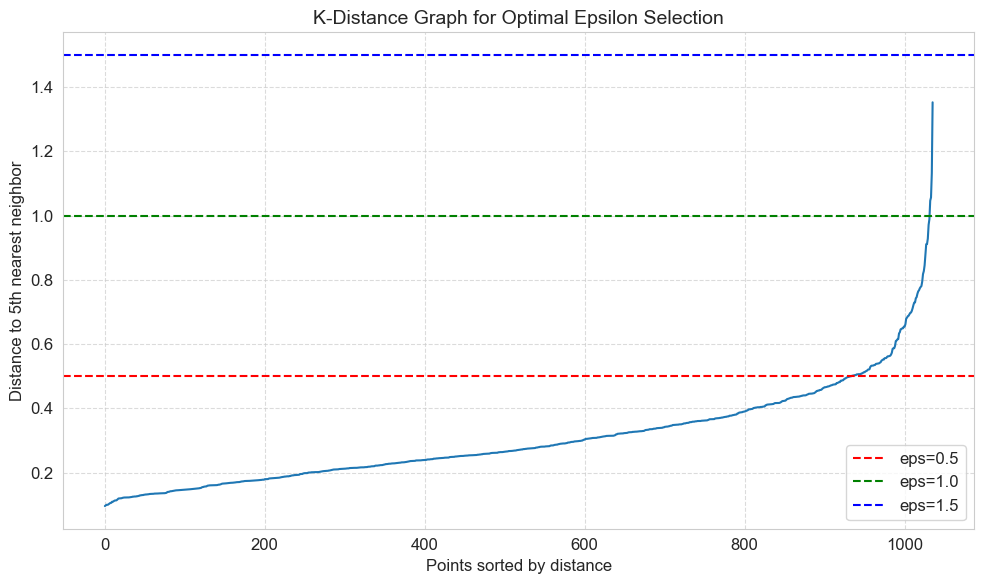

Suggested eps value based on k-distance graph: 1.35

DBSCAN Parameter Testing Results:
        eps  min_samples  n_clusters  n_noise  silhouette  noise_percentage
0  0.500000            5          14       46   -0.148693          4.440154
1  0.500000           10          10      227   -0.122169         21.911197
2  1.000000            5           1        1   -1.000000          0.096525
3  1.000000           10           1        2   -1.000000          0.193050
4  1.500000            5           1        0   -1.000000          0.000000
5  1.500000           10           1        0   -1.000000          0.000000
6  1.352423            5           1        0   -1.000000          0.000000
7  1.352423           10           1        0   -1.000000          0.000000

Best parameters: eps=0.5, min_samples=10
Best silhouette score: -0.122

Cluster counts:
Cluster 0: 638 points (61.6%)
Cluster 1: 20 points (1.9%)
Cluster 2: 25 points (2.4%)
Cluster 3: 29 points (2.8%)
Cluster 4: 15 points (1.4%

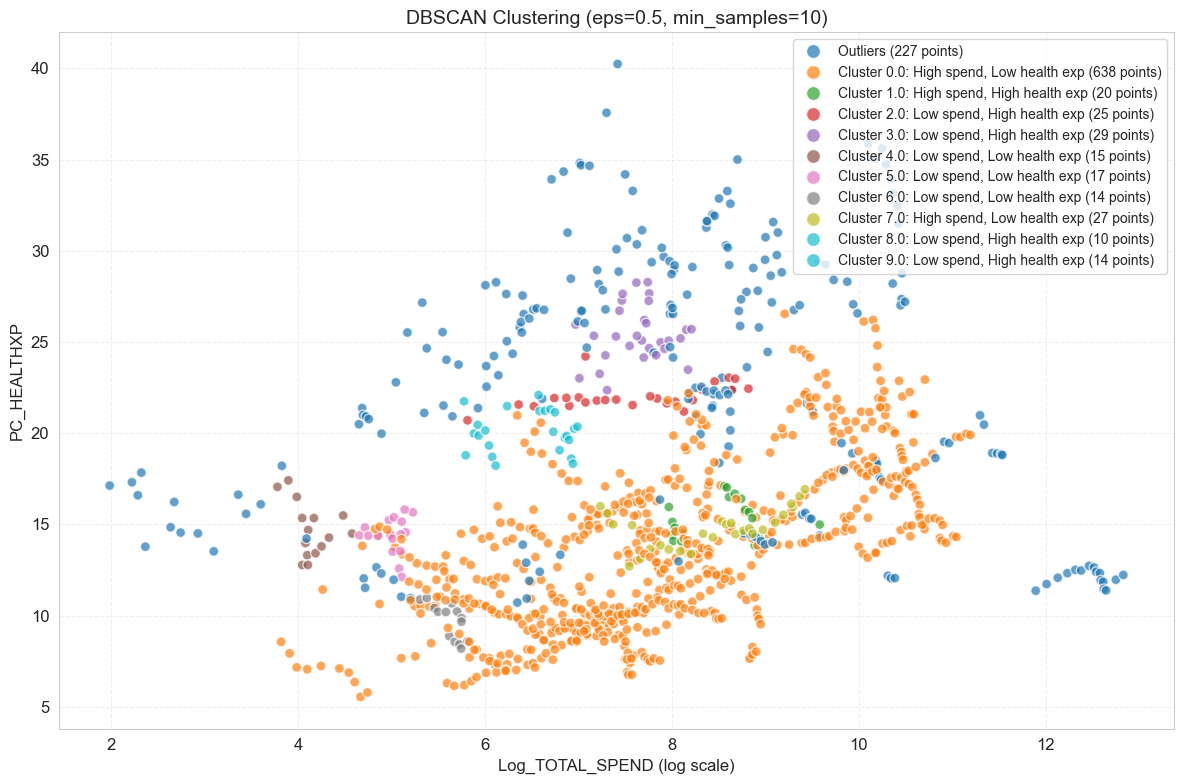

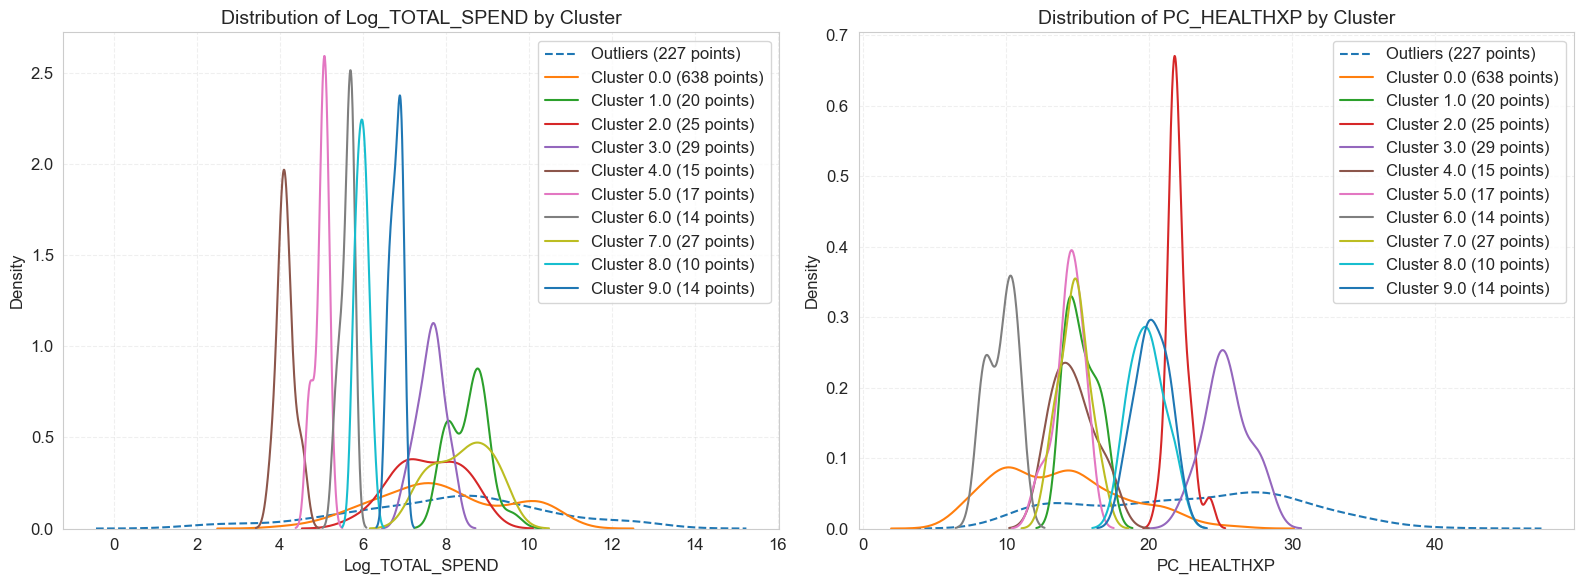


Cluster Characteristics Summary:
        Cluster                  Description  Size  Percentage  \
0      Outliers                     Outliers   227   21.911197   
1   Cluster 0.0   High spend, Low health exp   638   61.583012   
2   Cluster 1.0  High spend, High health exp    20    1.930502   
3   Cluster 2.0   Low spend, High health exp    25    2.413127   
4   Cluster 3.0   Low spend, High health exp    29    2.799228   
5   Cluster 4.0    Low spend, Low health exp    15    1.447876   
6   Cluster 5.0    Low spend, Low health exp    17    1.640927   
7   Cluster 6.0    Low spend, Low health exp    14    1.351351   
8   Cluster 7.0   High spend, Low health exp    27    2.606178   
9   Cluster 8.0   Low spend, High health exp    10    0.965251   
10  Cluster 9.0   Low spend, High health exp    14    1.351351   

    TOTAL_SPEND_Mean  TOTAL_SPEND_Median  PC_HEALTHXP_Mean  \
0        3077.880960         4094.150000         22.879194   
1        2781.618392         2362.344651         

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm

def load_and_prepare_data(file_path, required_columns=None):
    """
    Load dataset and prepare features for DBSCAN clustering
    
    Parameters:
    -----------
    file_path : str
        Path to the CSV file
    required_columns : list, optional
        List of column names to use as features
        
    Returns:
    --------
    tuple
        Processed feature data, original dataframe, and list of features used
    """
    # Load dataset
    data = pd.read_csv(file_path)
    
    # Set default required columns if not provided
    if required_columns is None:
        required_columns = ['TOTAL_SPEND', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP']
    
    # Check if required columns exist
    features = []
    for col in required_columns:
        if col in data.columns:
            features.append(col)
        else:
            print(f"Warning: Column '{col}' not found. Using available columns only.")
    
    print(f"Using features for DBSCAN: {features}")
    
    # Apply log transformation to TOTAL_SPEND to handle skewness
    if 'TOTAL_SPEND' in features:
        data['Log_TOTAL_SPEND'] = np.log1p(data['TOTAL_SPEND'])
        features = [col if col != 'TOTAL_SPEND' else 'Log_TOTAL_SPEND' for col in features]
    
    # Drop missing values to avoid issues
    X = data[features].dropna()
    print(f"Data shape after removing missing values: {X.shape}")
    
    return X, data, features

def find_optimal_eps(X, k=5, save_plot=True, plot_filename='dbscan_kdistance.png'):
    """
    Find the optimal epsilon parameter for DBSCAN using k-distance graph
    
    Parameters:
    -----------
    X : pandas.DataFrame
        Feature data
    k : int, optional
        Number of nearest neighbors to consider
    save_plot : bool, optional
        Whether to save the k-distance plot
    plot_filename : str, optional
        Filename to save the plot
        
    Returns:
    --------
    tuple
        Suggested epsilon value, scaled data, and k value used
    """
    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Ensure k is valid for small datasets
    k = min(k, len(X) - 1)
    print(f"Using k={k} for nearest neighbors calculation")
    
    # Calculate distances to nearest neighbors
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X_scaled)
    distances, indices = neigh.kneighbors(X_scaled)
    
    # Sort distances to find the elbow
    distances = np.sort(distances[:, k-1])
    
    # Plot k-distance graph
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.axhline(y=0.5, color='r', linestyle='--', label='eps=0.5')
    plt.axhline(y=1.0, color='g', linestyle='--', label='eps=1.0')
    plt.axhline(y=1.5, color='b', linestyle='--', label='eps=1.5')
    plt.xlabel('Points sorted by distance', fontsize=12)
    plt.ylabel(f'Distance to {k}th nearest neighbor', fontsize=12)
    plt.title('K-Distance Graph for Optimal Epsilon Selection', fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    if save_plot:
        plt.savefig(plot_filename, dpi=300)
    
    plt.tight_layout()
    plt.show()
    
    # Find the elbow point in the k-distance graph
    diff = np.diff(distances)
    elbow_idx = np.argmax(diff) + 1
    suggested_eps = distances[elbow_idx]
    print(f"Suggested eps value based on k-distance graph: {suggested_eps:.2f}")
    
    return suggested_eps, X_scaled, k

def evaluate_dbscan_parameters(X_scaled, eps_values=None, min_samples_values=None):
    """
    Evaluate different combinations of DBSCAN parameters
    
    Parameters:
    -----------
    X_scaled : numpy.ndarray
        Scaled feature data
    eps_values : list, optional
        List of epsilon values to test
    min_samples_values : list, optional
        List of min_samples values to test
        
    Returns:
    --------
    tuple
        Best parameters, best silhouette score, results dataframe, and best labels
    """
    # Set default parameter values if not provided
    if eps_values is None:
        eps_values = [0.5, 1.0, 1.5]
    if min_samples_values is None:
        min_samples_values = [5, 10]
    
    best_silhouette = -1
    best_params = None
    best_labels = None
    results = []
    
    for eps in eps_values:
        for min_samples in min_samples_values:
            # Apply DBSCAN
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X_scaled)
            
            # Number of clusters (excluding noise points with label -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise = list(labels).count(-1)
            
            # Calculate silhouette score if possible
            silhouette = -1  # Default for invalid configurations
            if n_clusters >= 2 and len(set(labels)) > 1 and len(labels) - n_noise >= 2:
                # Calculate silhouette only for non-noise points
                if n_noise < len(labels):
                    # Create masks for non-noise points
                    non_noise_mask = labels != -1
                    if np.sum(non_noise_mask) >= 2:  # Need at least 2 points for silhouette
                        silhouette = silhouette_score(
                            X_scaled[non_noise_mask], 
                            labels[non_noise_mask]
                        )
            
            results.append({
                'eps': eps,
                'min_samples': min_samples,
                'n_clusters': n_clusters,
                'n_noise': n_noise,
                'silhouette': silhouette,
                'noise_percentage': n_noise / len(labels) * 100 if labels.size > 0 else 0
            })
            
            # Track best configuration
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_params = {'eps': eps, 'min_samples': min_samples}
                best_labels = labels
    
    # Create dataframe of results
    results_df = pd.DataFrame(results)
    print("\nDBSCAN Parameter Testing Results:")
    print(results_df)
    
    # Select best parameters or use default if none worked well
    if best_params is not None:
        print(f"\nBest parameters: eps={best_params['eps']}, min_samples={best_params['min_samples']}")
        print(f"Best silhouette score: {best_silhouette:.3f}")
    else:
        print("\nCould not find optimal parameters with silhouette score. Using default values.")
        best_params = {'eps': 1.0, 'min_samples': 5}
        best_silhouette = -1
    
    return best_params, best_silhouette, results_df, best_labels

def perform_dbscan_clustering(X, X_scaled, data, features, eps, min_samples):
    """
    Perform DBSCAN clustering with given parameters
    
    Parameters:
    -----------
    X : pandas.DataFrame
        Feature data
    X_scaled : numpy.ndarray
        Scaled feature data
    data : pandas.DataFrame
        Original dataframe
    features : list
        List of feature names
    eps : float
        Epsilon parameter for DBSCAN
    min_samples : int
        Min_samples parameter for DBSCAN
        
    Returns:
    --------
    tuple
        Updated dataframe with clusters, cluster descriptions, and cluster counts
    """
    # Apply DBSCAN with selected parameters
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)
    
    # Add cluster labels to original dataframe
    data.loc[X.index, 'DBSCAN_Cluster'] = labels
    
    # Count the number of points in each cluster
    unique_clusters = set(labels)
    cluster_counts = {cluster: list(labels).count(cluster) for cluster in unique_clusters}
    print("\nCluster counts:")
    for cluster, count in cluster_counts.items():
        cluster_name = "Noise" if cluster == -1 else f"Cluster {cluster}"
        print(f"{cluster_name}: {count} points ({count/len(labels)*100:.1f}%)")
    
    # Create descriptive names for clusters based on their characteristics
    cluster_descriptions = {}
    for cluster in sorted(unique_clusters):
        if cluster == -1:
            cluster_descriptions[cluster] = "Outliers"
            continue
        
        # Get cluster data
        cluster_data = X[labels == cluster]
        
        # Calculate mean values for each feature
        means = cluster_data.mean()
        
        # Determine if this is high, medium, or low for each feature
        if 'Log_TOTAL_SPEND' in features:
            spend_level = "High spend" if means['Log_TOTAL_SPEND'] > X['Log_TOTAL_SPEND'].median() else "Low spend"
        else:
            spend_level = ""
        
        if 'PC_HEALTHXP' in features:
            health_level = "High health exp" if means['PC_HEALTHXP'] > X['PC_HEALTHXP'].median() else "Low health exp"
        else:
            health_level = ""
        
        # Combine descriptions
        description = f"{spend_level}, {health_level}".strip(", ")
        cluster_descriptions[cluster] = description
    
    # Apply cluster descriptions to the data
    data['DBSCAN_Description'] = data['DBSCAN_Cluster'].map(
        lambda x: cluster_descriptions.get(x, "Unclustered")
    )
    
    return data, cluster_descriptions, cluster_counts

def visualize_clusters(X, features, labels, eps, min_samples, cluster_descriptions, cluster_counts, save_plot=True, plot_filename='dbscan_clusters.png'):
    """
    Create scatter plot visualization of the clusters
    
    Parameters:
    -----------
    X : pandas.DataFrame
        Feature data
    features : list
        List of feature names
    labels : numpy.ndarray
        Cluster labels
    eps : float
        Epsilon parameter used
    min_samples : int
        Min_samples parameter used
    cluster_descriptions : dict
        Cluster descriptions
    cluster_counts : dict
        Count of points in each cluster
    save_plot : bool, optional
        Whether to save the plot
    plot_filename : str, optional
        Filename to save the plot
    """
    unique_clusters = set(labels)
    
    # Scatter plot of clusters
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        X['Log_TOTAL_SPEND'] if 'Log_TOTAL_SPEND' in features else X.iloc[:, 0],
        X['PC_HEALTHXP'] if 'PC_HEALTHXP' in features else X.iloc[:, 1],
        c=labels,
        cmap=cm.tab10,
        s=50,
        alpha=0.7,
        edgecolors='w'
    )
    
    # Add feature names to the axis labels
    plt.xlabel(f"{features[0]} {'(log scale)' if features[0] == 'Log_TOTAL_SPEND' else ''}", fontsize=12)
    plt.ylabel(f"{features[1]}", fontsize=12)
    plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})', fontsize=14)
    
    # Add legend with cluster descriptions
    legend_elements = []
    for cluster in sorted(unique_clusters):
        color = scatter.cmap(scatter.norm(cluster))
        if cluster == -1:
            legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', 
                                label=f'Outliers ({cluster_counts[cluster]} points)',
                                markerfacecolor=color, markersize=10, alpha=0.7))
        else:
            legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', 
                                label=f'Cluster {cluster}: {cluster_descriptions[cluster]} ({cluster_counts[cluster]} points)',
                                markerfacecolor=color, markersize=10, alpha=0.7))
    
    plt.legend(handles=legend_elements, loc='upper right', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    
    if save_plot:
        plt.savefig(plot_filename, dpi=300)
    
    plt.show()

def visualize_distributions(X, features, labels, cluster_counts, save_plot=True, plot_filename='dbscan_distributions.png'):
    """
    Create distribution plots for each feature by cluster
    
    Parameters:
    -----------
    X : pandas.DataFrame
        Feature data
    features : list
        List of feature names
    labels : numpy.ndarray
        Cluster labels
    cluster_counts : dict
        Count of points in each cluster
    save_plot : bool, optional
        Whether to save the plot
    plot_filename : str, optional
        Filename to save the plot
    """
    unique_clusters = set(labels)
    
    if len(features) >= 2:
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Feature 1 distribution
        for cluster in sorted(unique_clusters):
            cluster_data = X[labels == cluster]
            if len(cluster_data) > 0:
                if cluster == -1:
                    sns.kdeplot(
                        cluster_data[features[0]], 
                        ax=axes[0], 
                        label=f'Outliers ({cluster_counts[cluster]} points)',
                        linestyle='--'
                    )
                else:
                    sns.kdeplot(
                        cluster_data[features[0]], 
                        ax=axes[0], 
                        label=f'Cluster {cluster} ({cluster_counts[cluster]} points)'
                    )
        
        axes[0].set_xlabel(features[0], fontsize=12)
        axes[0].set_ylabel('Density', fontsize=12)
        axes[0].set_title(f'Distribution of {features[0]} by Cluster', fontsize=14)
        axes[0].legend()
        axes[0].grid(True, linestyle='--', alpha=0.3)
        
        # Feature 2 distribution
        for cluster in sorted(unique_clusters):
            cluster_data = X[labels == cluster]
            if len(cluster_data) > 0:
                if cluster == -1:
                    sns.kdeplot(
                        cluster_data[features[1]], 
                        ax=axes[1], 
                        label=f'Outliers ({cluster_counts[cluster]} points)',
                        linestyle='--'
                    )
                else:
                    sns.kdeplot(
                        cluster_data[features[1]], 
                        ax=axes[1], 
                        label=f'Cluster {cluster} ({cluster_counts[cluster]} points)'
                    )
        
        axes[1].set_xlabel(features[1], fontsize=12)
        axes[1].set_ylabel('Density', fontsize=12)
        axes[1].set_title(f'Distribution of {features[1]} by Cluster', fontsize=14)
        axes[1].legend()
        axes[1].grid(True, linestyle='--', alpha=0.3)
        
        plt.tight_layout()
        
        if save_plot:
            plt.savefig(plot_filename, dpi=300)
        
        plt.show()

def analyze_cluster_characteristics(data, features, save_summary=True, summary_filename='dbscan_cluster_summary.csv'):
    """
    Analyze and summarize cluster characteristics
    
    Parameters:
    -----------
    data : pandas.DataFrame
        Dataframe with cluster assignments
    features : list
        List of feature names
    save_summary : bool, optional
        Whether to save the summary
    summary_filename : str, optional
        Filename to save the summary
        
    Returns:
    --------
    pandas.DataFrame
        Summary of cluster characteristics
    """
    unique_clusters = set(data['DBSCAN_Cluster'].dropna())
    
    if len(unique_clusters) > 1:
        # Create a summary of cluster characteristics
        cluster_stats = []
        
        for cluster in sorted(unique_clusters):
            cluster_data = data[data['DBSCAN_Cluster'] == cluster]
            
            if len(cluster_data) > 0:
                stats = {}
                stats['Cluster'] = "Outliers" if cluster == -1 else f"Cluster {cluster}"
                stats['Description'] = cluster_data['DBSCAN_Description'].iloc[0]
                stats['Size'] = len(cluster_data)
                stats['Percentage'] = len(cluster_data) / len(data) * 100
                
                # Calculate statistics for each feature
                for feature in features:
                    feature_name = feature
                    if feature == 'Log_TOTAL_SPEND':
                        # For log-transformed features, show statistics in original scale
                        feature_name = 'TOTAL_SPEND'
                        stats[f'{feature_name}_Mean'] = np.exp(cluster_data[feature].mean()) - 1
                        stats[f'{feature_name}_Median'] = np.exp(cluster_data[feature].median()) - 1
                    else:
                        stats[f'{feature_name}_Mean'] = cluster_data[feature].mean()
                        stats[f'{feature_name}_Median'] = cluster_data[feature].median()
                
                cluster_stats.append(stats)
        
        # Create DataFrame with cluster statistics
        cluster_summary = pd.DataFrame(cluster_stats)
        print("\nCluster Characteristics Summary:")
        print(cluster_summary)
        
        # Save cluster summary to CSV
        if save_summary:
            cluster_summary.to_csv(summary_filename, index=False)
        
        return cluster_summary
    
    return None

def run_dbscan_analysis(file_path, required_columns=None, eps=None, min_samples=None, save_results=True):
    """
    Run the complete DBSCAN analysis pipeline
    
    Parameters:
    -----------
    file_path : str
        Path to the CSV file
    required_columns : list, optional
        List of column names to use as features
    eps : float, optional
        Epsilon parameter for DBSCAN (if None, will be optimized)
    min_samples : int, optional
        Min_samples parameter for DBSCAN (if None, will be optimized)
    save_results : bool, optional
        Whether to save results and plots
        
    Returns:
    --------
    tuple
        Dataframe with cluster assignments, cluster summary
    """
    # Step 1: Load and prepare data
    X, data, features = load_and_prepare_data(file_path, required_columns)
    
    # Step 2: Find optimal eps if not provided
    if eps is None:
        suggested_eps, X_scaled, k = find_optimal_eps(X, save_plot=save_results)
        # Include suggested eps in the list of values to test
        eps_values = [0.5, 1.0, 1.5, suggested_eps]
    else:
        # Standardize the data
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        eps_values = [eps]
    
    # Step 3: Evaluate parameters if min_samples not provided
    if min_samples is None:
        min_samples_values = [5, 10]
        best_params, best_silhouette, results_df, best_labels = evaluate_dbscan_parameters(
            X_scaled, eps_values, min_samples_values
        )
        eps = best_params['eps']
        min_samples = best_params['min_samples']
    else:
        best_params = {'eps': eps, 'min_samples': min_samples}
    
    # Step 4: Perform DBSCAN clustering
    data, cluster_descriptions, cluster_counts = perform_dbscan_clustering(
        X, X_scaled, data, features, eps, min_samples
    )
    
    # Get labels from the data
    labels = data.loc[X.index, 'DBSCAN_Cluster'].values
    
    # Step 5: Visualize clusters
    visualize_clusters(
        X, features, labels, eps, min_samples, 
        cluster_descriptions, cluster_counts, save_plot=save_results
    )
    
    # Step 6: Visualize distributions
    visualize_distributions(X, features, labels, cluster_counts, save_plot=save_results)
    
    # Step 7: Analyze cluster characteristics
    cluster_summary = analyze_cluster_characteristics(data, features, save_summary=save_results)
    
    # Step 8: Save results
    if save_results:
        data.to_csv('data_with_dbscan_clusters.csv', index=False)
        print("\nDBSCAN clustering complete. Results saved to 'data_with_dbscan_clusters.csv'")
    
    return data, cluster_summary

# Example usage
if __name__ == "__main__":
    # Run the complete analysis
    results, summary = run_dbscan_analysis("data_csv.csv")
    
    # Or run step by step
    # X, data, features = load_and_prepare_data("data_csv.csv")
    # suggested_eps, X_scaled, k = find_optimal_eps(X)
    # best_params, best_silhouette, results_df, best_labels = evaluate_dbscan_parameters(X_scaled, [0.5, 1.0, 1.5, suggested_eps], [5, 10])
    # data, cluster_descriptions, cluster_counts = perform_dbscan_clustering(X, X_scaled, data, features, best_params['eps'], best_params['min_samples'])
    # labels = data.loc[X.index, 'DBSCAN_Cluster'].values
    # visualize_clusters(X, features, labels, best_params['eps'], best_params['min_samples'], cluster_descriptions, cluster_counts)
    # visualize_distributions(X, features, labels, cluster_counts)
    # cluster_summary = analyze_cluster_characteristics(data, features)

---

## Step 5: Generate Statistical Insights  
We will examine the clusters to identify patterns and trends, and then derive meaningful insights from the analysis.

### 5.1 SEE K-Means Clustering Analysis

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.spatial.distance import cdist
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

# Function to calculate within-cluster variance
def within_cluster_variance(X, labels, centroids):
    variance = 0
    for i, centroid in enumerate(centroids):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            variance += np.sum(cdist(cluster_points, [centroid], 'sqeuclidean'))
    return variance / len(X)

# Enhanced SESSA function with adaptive alpha
def calculate_sessa(X, labels, centroids, alpha=0.1, cluster_count=None):
    """
    Calculate SESSA (Silhouette-Enhanced Self-Adjusting) score
    
    Parameters:
    -----------
    X : array-like
        Input data
    labels : array-like
        Cluster labels
    centroids : array-like
        Cluster centroids
    alpha : float
        Weight parameter for within-cluster variance
    cluster_count : int
        Number of clusters (used for adaptive alpha)
        
    Returns:
    --------
    sessa_score : float
        The calculated SESSA score
    silhouette : float
        Silhouette score component
    wcv : float
        Within-cluster variance component
    """
    # Calculate silhouette score (cohesion and separation metric)
    silhouette = silhouette_score(X, labels)
    
    # Calculate within-cluster variance (compactness metric)
    wcv = within_cluster_variance(X, labels, centroids)
    
    # Adaptive alpha: as cluster number increases, we penalize complexity more
    if cluster_count is not None:
        # Adjust alpha linearly with cluster count (higher clusters = higher alpha)
        adaptive_alpha = alpha * (1 + (cluster_count - 2) * 0.05)
    else:
        adaptive_alpha = alpha
    
    # Final SESSA score calculation
    sessa_score = silhouette - adaptive_alpha * wcv
    
    return sessa_score, silhouette, wcv

# Function to generate detailed statistical insights from clustering
def generate_statistical_insights(X, labels, centroids, sessa_scores, wcv_scores, features, optimal_k):
    """
    Generate detailed statistical insights from clustering results
    
    Parameters:
    -----------
    X : array-like
        Input data
    labels : array-like
        Cluster labels
    centroids : array-like
        Cluster centroids
    sessa_scores : list
        SESSA scores for different k values
    wcv_scores : list
        Within-cluster variance scores for different k values
    features : list
        Feature names used in clustering
    optimal_k : int
        Optimal number of clusters
        
    Returns:
    --------
    cluster_stats : DataFrame
        Detailed statistics for each cluster
    """
    silhouette_vals = silhouette_samples(X, labels)
    cluster_sizes = np.bincount(labels)
    
    # Create and populate cluster statistics DataFrame
    cluster_stats = pd.DataFrame(index=range(optimal_k))
    cluster_stats['Size'] = cluster_sizes
    cluster_stats['Percentage'] = (cluster_sizes / len(X) * 100).round(1)
    
    # Add statistics for each feature
    for f_idx, feature in enumerate(features):
        cluster_stats[f'Avg_{feature}'] = [X[labels == i, f_idx].mean() for i in range(optimal_k)]
        cluster_stats[f'Std_{feature}'] = [X[labels == i, f_idx].std() for i in range(optimal_k)]
        cluster_stats[f'Min_{feature}'] = [X[labels == i, f_idx].min() for i in range(optimal_k)]
        cluster_stats[f'Max_{feature}'] = [X[labels == i, f_idx].max() for i in range(optimal_k)]
    
    # Calculate average silhouette score per cluster
    cluster_stats['Avg_Silhouette'] = [silhouette_vals[labels == i].mean() for i in range(optimal_k)]
    
    # Print detailed statistical insights
    print("\n=== SESSA K-means Clustering Statistical Insights ===\n")
    
    # 1. Overall Clustering Performance
    print("1. Overall Clustering Performance:")
    print(f"• Optimal number of clusters (k): {optimal_k}")
    print(f"• Maximum SESSA score: {max(sessa_scores):.4f}")
    print(f"• Average silhouette score: {np.mean(silhouette_vals):.4f}")
    print(f"• Global within-cluster variance: {wcv_scores[optimal_k-2]:.4f}")
    
    # 2. Cluster Distribution Analysis
    print("\n2. Cluster Distribution Analysis:")
    for i in range(optimal_k):
        print(f"\nCluster {i} Statistics:")
        print(f"• Size: {cluster_sizes[i]} points ({cluster_sizes[i]/len(X)*100:.1f}%)")
        print(f"• Average silhouette score: {cluster_stats['Avg_Silhouette'][i]:.4f}")
        
        # Print range for each feature
        for f_idx, feature in enumerate(features):
            print(f"• {feature} range: {cluster_stats[f'Min_{feature}'][i]:.2f} to {cluster_stats[f'Max_{feature}'][i]:.2f}")
    
    # 3. Cluster Characteristics
    print("\n3. Cluster Characteristics:")
    for i in range(optimal_k):
        print(f"\nCluster {i}:")
        for f_idx, feature in enumerate(features):
            print(f"• Average {feature}: {cluster_stats[f'Avg_{feature}'][i]:.2f} (±{cluster_stats[f'Std_{feature}'][i]:.2f})")
    
    # 4. Inter-cluster Distance Analysis
    centroid_distances = cdist(centroids, centroids)
    print("\n4. Inter-cluster Distance Analysis:")
    for i in range(optimal_k):
        for j in range(i+1, optimal_k):
            print(f"• Distance between Cluster {i} and {j}: {centroid_distances[i][j]:.2f}")
    
    # 5. Cluster Compactness Analysis
    print("\n5. Cluster Compactness Analysis:")
    for i in range(optimal_k):
        cluster_points = X[labels == i]
        centroid = centroids[i]
        distances = cdist([centroid], cluster_points)[0]
        print(f"\nCluster {i}:")
        print(f"• Average distance to centroid: {np.mean(distances):.2f}")
        print(f"• Maximum distance to centroid: {np.max(distances):.2f}")
        print(f"• Standard deviation of distances: {np.std(distances):.2f}")
    
    # 6. Summary and Recommendations
    print("\n6. Summary and Recommendations:")
    best_cluster = np.argmax(cluster_stats['Avg_Silhouette'])
    worst_cluster = np.argmin(cluster_stats['Avg_Silhouette'])
    print(f"• Most cohesive cluster: Cluster {best_cluster} (Silhouette: {cluster_stats['Avg_Silhouette'][best_cluster]:.4f})")
    print(f"• Least cohesive cluster: Cluster {worst_cluster} (Silhouette: {cluster_stats['Avg_Silhouette'][worst_cluster]:.4f})")
    
    # Calculate cluster density (points per unit area)
    for i in range(optimal_k):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            max_dist = np.max(cdist([centroids[i]], cluster_points)) if len(cluster_points) > 1 else 0
            area = np.pi * (max_dist ** 2) if max_dist > 0 else 1
            density = len(cluster_points) / area
            print(f"• Cluster {i} density: {density:.2f} points per unit area")
    
    return cluster_stats

# Main SEE function for clustering analysis
def See(data, features=['TIME', 'TOTAL_SPEND']):
    """
    Sequential Event Estimation function for clustering analysis
    
    Parameters:
    -----------
    data : DataFrame
        Data with columns like LOCATION, TIME, TOTAL_SPEND, etc.
    features : list
        List of features to use for clustering
        
    Returns:
    --------
    dict
        Enhanced data with cluster information and visualizations
    """
    print(f"Starting SEE analysis using features: {features}")
    
    # Ensure we have a copy to work with
    X = data[features].values
    
    # Check for any missing values
    if np.isnan(X).any():
        print("Warning: Data contains missing values. Handling them...")
        # Simple imputation by column means
        for col_idx in range(X.shape[1]):
            col_mean = np.nanmean(X[:, col_idx])
            X[np.isnan(X[:, col_idx]), col_idx] = col_mean
    
    # Calculate metrics for different values of k
    k_range = range(2, 11)
    sessa_scores = []
    silhouette_scores = []
    wcv_scores = []
    adaptive_alphas = []

    # Create dataframe to store all metrics
    metrics_df = pd.DataFrame(columns=['k', 'SESSA', 'Silhouette', 'WCV', 'Adaptive_Alpha'])

    for k in k_range:
        # Fit K-Means
        kmeans = KMeans(n_clusters=k, random_state=1234, n_init=10)
        kmeans.fit(X)
        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_
        
        # Calculate adaptive alpha
        adaptive_alpha = 0.1 * (1 + (k - 2) * 0.05)
        
        # Calculate SESSA with all components
        sessa_score, silhouette, wcv = calculate_sessa(X, labels, centroids, alpha=0.1, cluster_count=k)
        
        # Store scores
        sessa_scores.append(sessa_score)
        silhouette_scores.append(silhouette)
        wcv_scores.append(wcv)
        adaptive_alphas.append(adaptive_alpha)
        
        # Add to metrics dataframe
        metrics_df = metrics_df._append({
            'k': k,
            'SESSA': sessa_score,
            'Silhouette': silhouette,
            'WCV': wcv,
            'Adaptive_Alpha': adaptive_alpha
        }, ignore_index=True)

    # Find optimal k
    optimal_k = k_range[np.argmax(sessa_scores)]
    print(f"Optimal number of clusters based on SESSA: {optimal_k}")

    # Create visualizations
    fig = plt.figure(figsize=(16, 12))

    # 1. SESSA Score plot
    ax1 = fig.add_subplot(2, 2, 1)
    ax1.plot(k_range, sessa_scores, marker='o', linestyle='-', linewidth=2, markersize=10, color='#1f77b4')
    ax1.axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, label=f'Optimal k={optimal_k}')
    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('SESSA Score')
    ax1.set_title('SESSA Score vs. Number of Clusters')
    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.7)

    # 2. Component comparison plot
    ax2 = fig.add_subplot(2, 2, 2)
    ax2.plot(k_range, silhouette_scores, marker='s', linestyle='-', linewidth=2, markersize=8, 
             color='green', label='Silhouette Score')
    ax2.plot(k_range, wcv_scores, marker='^', linestyle='-', linewidth=2, markersize=8, 
             color='orange', label='Within-Cluster Variance')
    ax2.plot(k_range, adaptive_alphas, marker='*', linestyle='--', linewidth=2, markersize=8, 
             color='purple', label='Adaptive Alpha')
    ax2.set_xlabel('Number of Clusters (k)')
    ax2.set_ylabel('Score')
    ax2.set_title('Component Scores vs. Number of Clusters')
    ax2.legend()
    ax2.grid(True, linestyle='--', alpha=0.7)

    # Final clustering with optimal k
    kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=1234, n_init=10)
    labels_optimal = kmeans_optimal.fit_predict(X)
    centroids_optimal = kmeans_optimal.cluster_centers_

    # 3. Clustered data visualization
    ax3 = fig.add_subplot(2, 2, 3)
    colors = plt.cm.viridis(np.linspace(0, 1, optimal_k))

    for i in range(optimal_k):
        cluster_points = X[labels_optimal == i]
        ax3.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, color=colors[i], 
                   alpha=0.7, label=f'Cluster {i}')

    ax3.scatter(centroids_optimal[:, 0], centroids_optimal[:, 1], s=200, marker='X', 
               color='red', label='Centroids')
    ax3.set_xlabel(features[0])
    ax3.set_ylabel(features[1])
    ax3.set_title(f'Optimal Clustering (k={optimal_k})')
    ax3.legend(loc='upper right')
    ax3.grid(True, linestyle='--', alpha=0.7)

    # 4. Metrics table
    ax4 = fig.add_subplot(2, 2, 4)
    ax4.axis('off')
    table_data = [
        ['k', 'SESSA', 'Silhouette', 'WCV', 'Alpha'],
    ]
    for _, row in metrics_df.iterrows():
        table_data.append([
            f"{row['k']:.0f}",
            f"{row['SESSA']:.4f}",
            f"{row['Silhouette']:.4f}",
            f"{row['WCV']:.4f}",
            f"{row['Adaptive_Alpha']:.4f}"
        ])

    table = ax4.table(cellText=table_data, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)
    ax4.set_title('Clustering Metrics Comparison')

    plt.tight_layout()
    plt.savefig('sessa_analysis.png', dpi=300, bbox_inches='tight')
    
    # Create silhouette plot for optimal k
    silhouette_vals = silhouette_samples(X, labels_optimal)
    
    plt.figure(figsize=(10, 7))
    y_ticks = []
    y_lower, y_upper = 0, 0

    for i in range(optimal_k):
        cluster_silhouette_vals = silhouette_vals[labels_optimal == i]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        
        color = colors[i]
        plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, 
                 height=1.0, edgecolor='none', color=color, alpha=0.7)
        
        y_ticks.append((y_lower + y_upper) / 2)
        y_lower += len(cluster_silhouette_vals)

    plt.axvline(x=np.mean(silhouette_vals), color='red', linestyle='--')
    plt.yticks(y_ticks, [f'Cluster {i}' for i in range(optimal_k)])
    plt.xlabel('Silhouette Coefficient')
    plt.ylabel('Cluster')
    plt.title('Silhouette Analysis for Optimal Clustering')
    plt.tight_layout()
    plt.savefig('silhouette_analysis.png', dpi=300, bbox_inches='tight')
    
    # Generate detailed statistical insights
    cluster_stats = generate_statistical_insights(
        X, labels_optimal, centroids_optimal, sessa_scores, wcv_scores, features, optimal_k
    )
    
    # Add cluster labels to original data
    data_enhanced = data.copy()
    data_enhanced['SEE_Cluster'] = labels_optimal
    
    # Return the output as a dictionary
    return {
        'optimal_k': optimal_k,
        'kmeans_model': kmeans_optimal,
        'labels': labels_optimal,
        'centroids': centroids_optimal,
        'sessa_score': max(sessa_scores),
        'enhanced_data': data_enhanced,
        'cluster_stats': cluster_stats,
        'metrics': metrics_df
    }

# Main execution function
def run_see_analysis(data_file='data_csv.csv', features=['TIME', 'TOTAL_SPEND']):
    """
    Run the SEE analysis on the specified data file
    
    Parameters:
    -----------
    data_file : str
        Path to the CSV data file
    features : list
        List of features to use for clustering
        
    Returns:
    --------
    dict
        The results of the SEE analysis
    """
    try:
        # Load the data
        print(f"Loading data from {data_file}...")
        data = pd.read_csv(data_file)
        print(f"Data loaded successfully with {data.shape[0]} rows and {data.shape[1]} columns")
        
        # Display column names to verify
        print("Available columns:", data.columns.tolist())
        
        # Verify that the required features exist
        missing_features = [f for f in features if f not in data.columns]
        if missing_features:
            print(f"Warning: The following features are missing from the data: {missing_features}")
            # Ask for alternative features
            valid_features = [f for f in features if f in data.columns]
            features = valid_features
            
        # Check data types and convert if necessary
        for feature in features:
            if feature in data.columns:
                if data[feature].dtype == 'object':
                    try:
                        data[feature] = pd.to_numeric(data[feature])
                        print(f"Converted {feature} to numeric type")
                    except:
                        print(f"Warning: Could not convert {feature} to numeric, this may cause issues")
        
        # Run the SEE analysis
        result = See(data, features)
        
        # Print summary of results
        print("\nSummary of SEE Analysis:")
        print(f"Optimal number of clusters: {result['optimal_k']}")
        print(f"Best SESSA score: {result['sessa_score']:.4f}")
        
        # Save the enhanced data
        enhanced_file = 'enhanced_' + data_file
        result['enhanced_data'].to_csv(enhanced_file, index=False)
        print(f"\nEnhanced data saved to {enhanced_file}")
        
        print("\nAnalysis complete! Visualizations saved as 'sessa_analysis.png' and 'silhouette_analysis.png'")
        
        return result
        
    except Exception as e:
        print(f"Error during analysis: {str(e)}")
        import traceback
        traceback.print_exc()
        return None



print("SEE K-means module with enhanced statistical insights loaded successfully!")


SEE K-means module with enhanced statistical insights loaded successfully!


Loading data from data_csv.csv...
Data loaded successfully with 1036 rows and 7 columns
Available columns: ['LOCATION', 'TIME', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'FLAG_CODES', 'TOTAL_SPEND']
Starting SEE analysis using features: ['TIME', 'TOTAL_SPEND']
Optimal number of clusters based on SESSA: 10

=== SESSA K-means Clustering Statistical Insights ===

1. Overall Clustering Performance:
• Optimal number of clusters (k): 10
• Maximum SESSA score: -1377120.1599
• Average silhouette score: 0.6812
• Global within-cluster variance: 9836577.4359

2. Cluster Distribution Analysis:

Cluster 0 Statistics:
• Size: 706 points (68.1%)
• Average silhouette score: 0.7666
• TIME range: 1970.00 to 2016.00
• TOTAL_SPEND range: 6.29 to 5322.24

Cluster 1 Statistics:
• Size: 8 points (0.8%)
• Average silhouette score: 0.5890
• TIME range: 2006.00 to 2013.00
• TOTAL_SPEND range: 258487.11 to 310154.01

Cluster 2 Statistics:
• Size: 59 points (5.7%)
• Average silhouette score: 0.5492
• TIME range: 1990.0

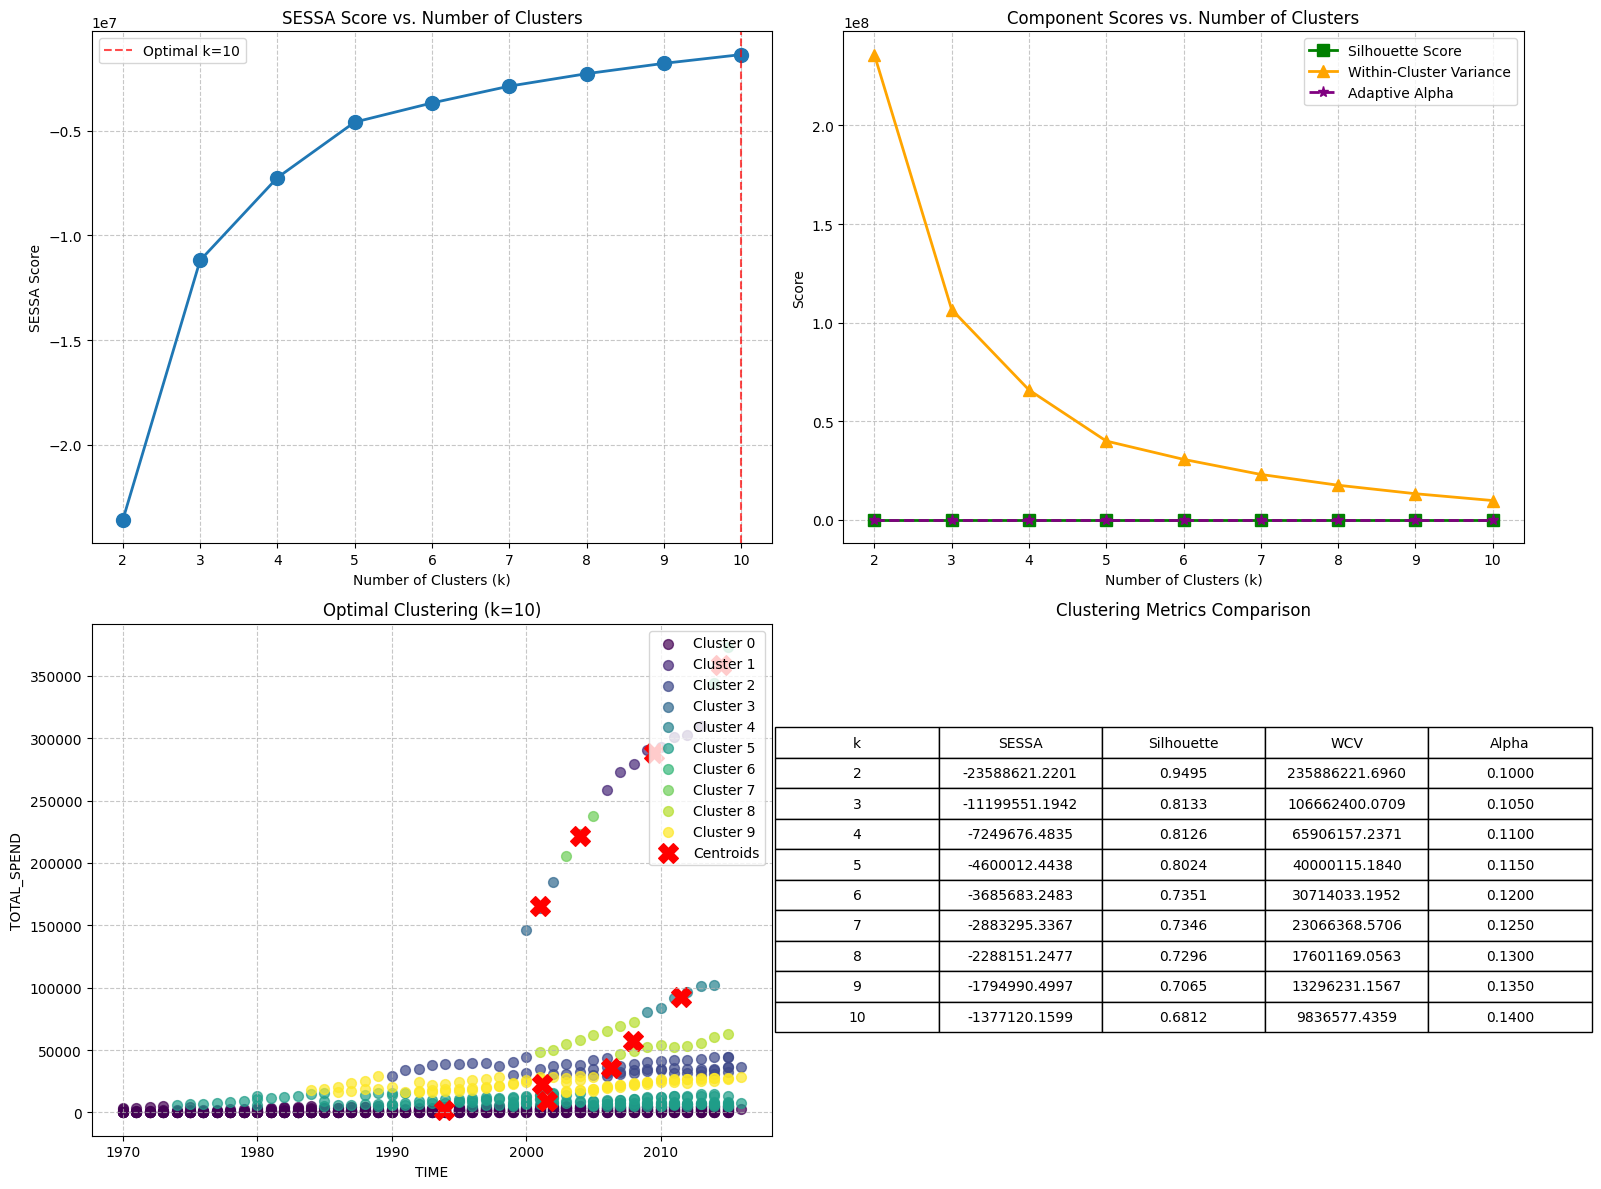

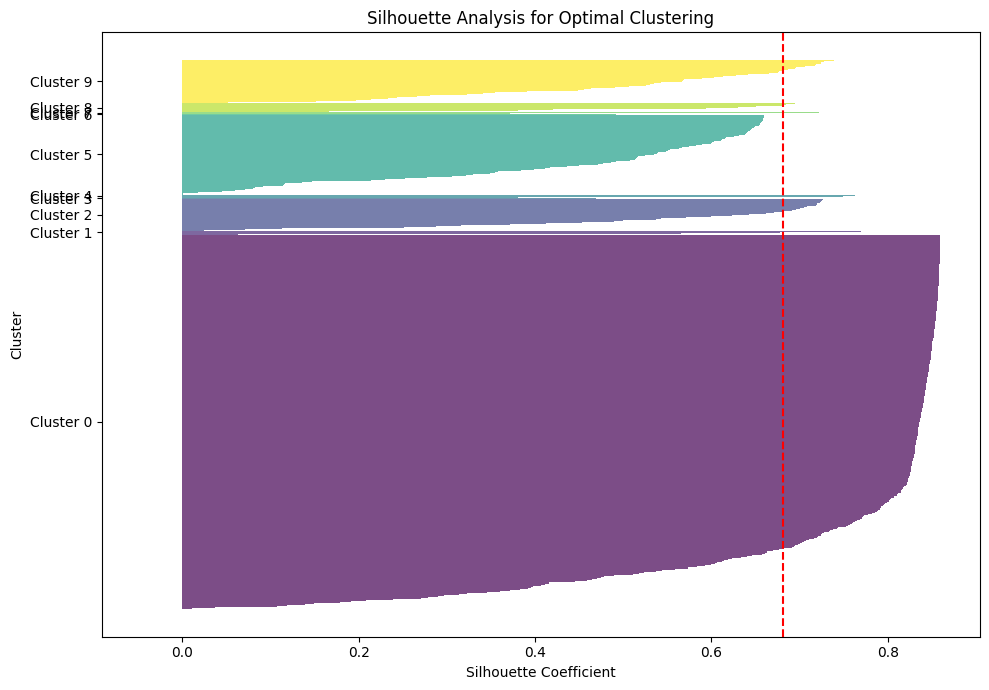

In [6]:

result = run_see_analysis('data_csv.csv')

### 5.2 Boxplot Analysis by Locations

No data provided, using sample data


C:\Users\siobh\AppData\Local\Temp\ipykernel_4008\4270359831.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="LOCATION", y="TOTAL_SPEND", data=df_sorted, palette="viridis")
C:\Users\siobh\AppData\Local\Temp\ipykernel_4008\4270359831.py:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df_sorted.groupby(['LOCATION'])['TOTAL_SPEND'].median()


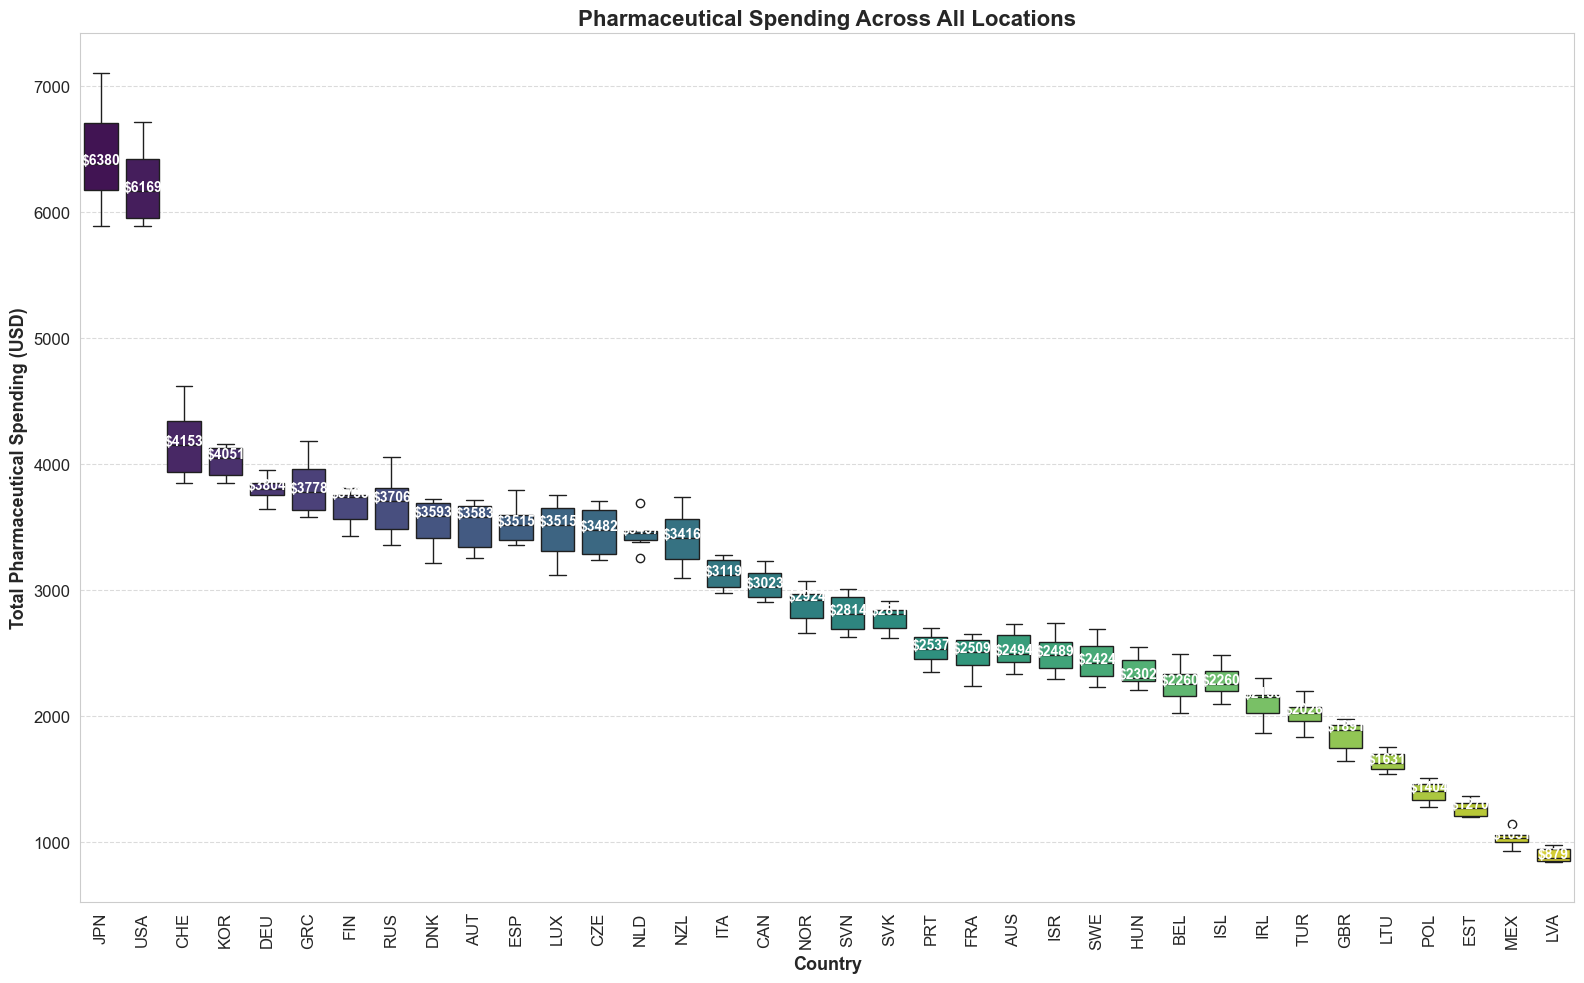

C:\Users\siobh\AppData\Local\Temp\ipykernel_4008\4270359831.py:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="REGION", y="TOTAL_SPEND", data=df_sorted, palette="Set3")
C:\Users\siobh\AppData\Local\Temp\ipykernel_4008\4270359831.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df_sorted.groupby(['REGION'])['TOTAL_SPEND'].median()


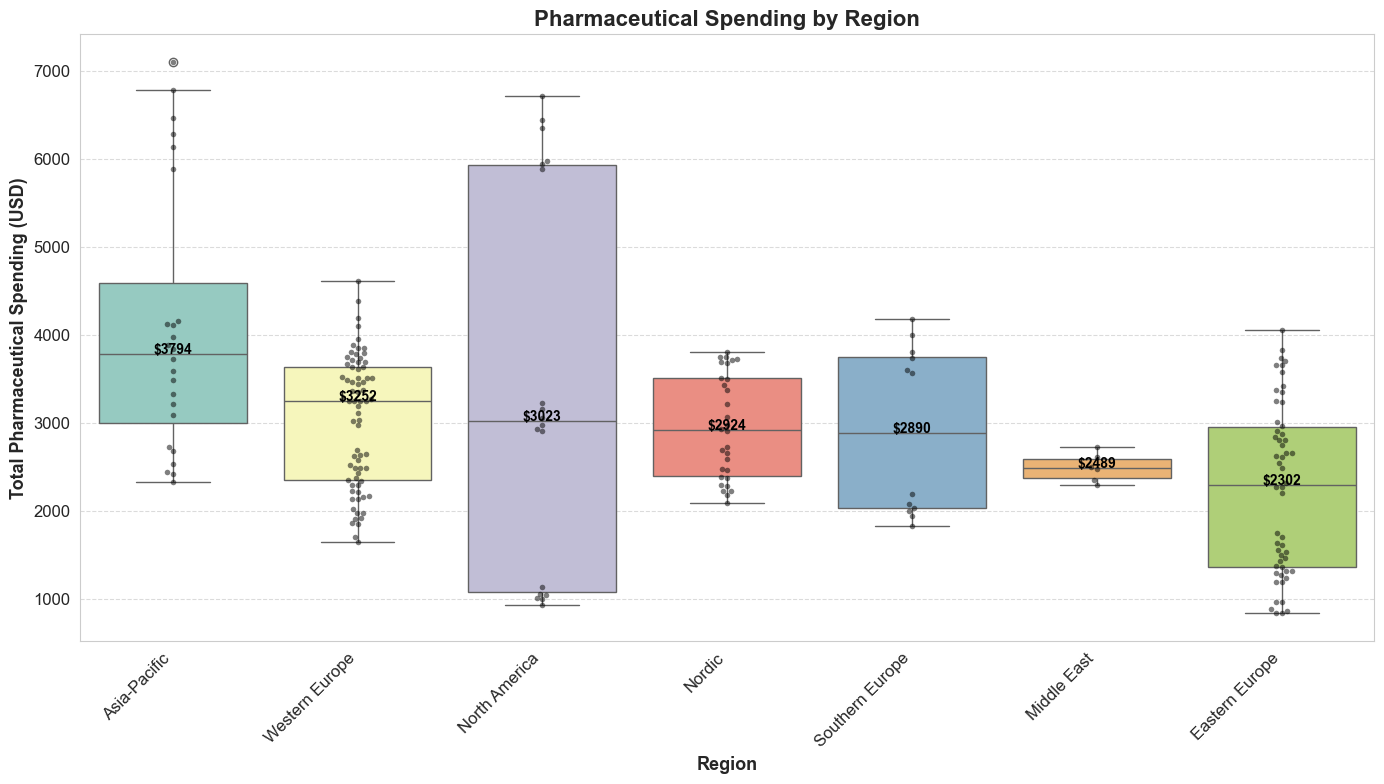


REGIONAL ANALYSIS OF PHARMACEUTICAL SPENDING:

Asia-Pacific (4 countries):
• Median Spending: $3793.95 USD
• Mean Spending: $4102.43 USD
• Range: $2331.87 to $7105.83 USD
• Standard Deviation: $1506.85 USD
• Interquartile Range: $1584.35 USD
• Highest Spending: JPN ($7105.83 USD)
• Lowest Spending: AUS ($2331.87 USD)

Western Europe (12 countries):
• Median Spending: $3252.04 USD
• Mean Spending: $3025.52 USD
• Range: $1648.47 to $4621.18 USD
• Standard Deviation: $741.52 USD
• Interquartile Range: $1290.09 USD
• Highest Spending: CHE ($4621.18 USD)
• Lowest Spending: GBR ($1648.47 USD)

North America (3 countries):
• Median Spending: $3023.02 USD
• Mean Spending: $3434.55 USD
• Range: $934.55 to $6714.96 USD
• Standard Deviation: $2206.90 USD
• Interquartile Range: $4853.08 USD
• Highest Spending: USA ($6714.96 USD)
• Lowest Spending: MEX ($934.55 USD)

Nordic (5 countries):
• Median Spending: $2923.68 USD
• Mean Spending: $2961.16 USD
• Range: $2094.48 to $3811.28 USD
• Standard Dev

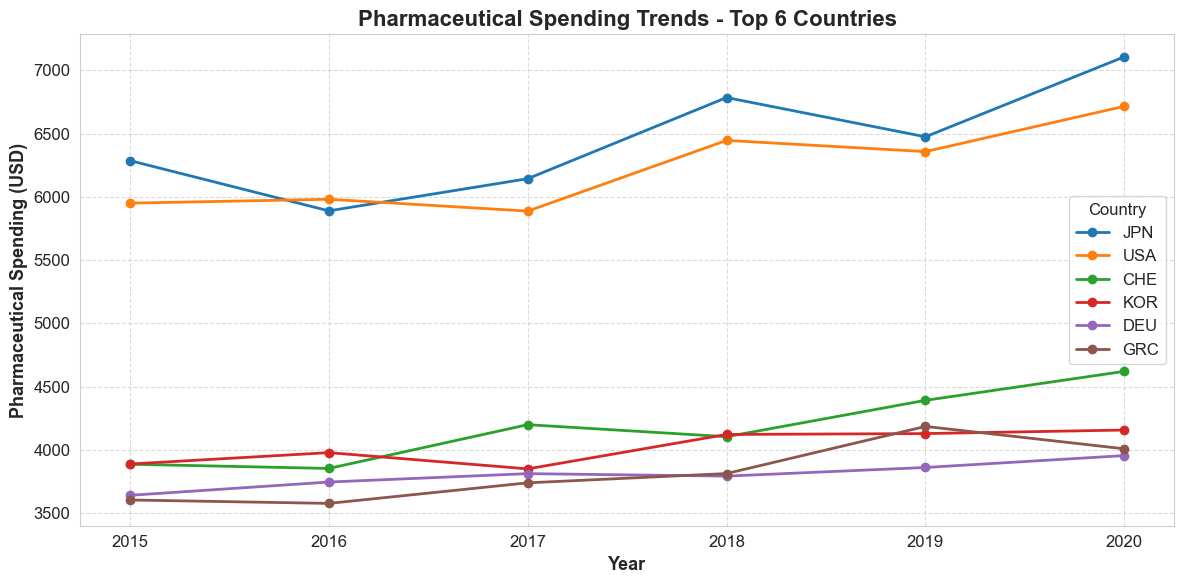

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def define_region_mapping():
    """Returns a dictionary mapping country codes to geographical regions."""
    return {
        # North America
        'USA': 'North America',
        'CAN': 'North America',
        'MEX': 'North America',
        
        # Europe - Western
        'GBR': 'Western Europe',
        'FRA': 'Western Europe',
        'DEU': 'Western Europe',
        'ITA': 'Western Europe',
        'ESP': 'Western Europe',
        'PRT': 'Western Europe',
        'IRL': 'Western Europe',
        'BEL': 'Western Europe', 
        'NLD': 'Western Europe',
        'LUX': 'Western Europe',
        'CHE': 'Western Europe',
        'AUT': 'Western Europe',
        
        # Europe - Nordic
        'DNK': 'Nordic',
        'FIN': 'Nordic',
        'ISL': 'Nordic',
        'NOR': 'Nordic',
        'SWE': 'Nordic',
        
        # Europe - Eastern
        'CZE': 'Eastern Europe',
        'EST': 'Eastern Europe',
        'HUN': 'Eastern Europe',
        'LTU': 'Eastern Europe',
        'LVA': 'Eastern Europe',
        'POL': 'Eastern Europe',
        'SVK': 'Eastern Europe',
        'SVN': 'Eastern Europe',
        'RUS': 'Eastern Europe',
        
        # Europe - Southern
        'GRC': 'Southern Europe',
        'TUR': 'Southern Europe',
        
        # Asia-Pacific
        'AUS': 'Asia-Pacific',
        'JPN': 'Asia-Pacific',
        'KOR': 'Asia-Pacific',
        'NZL': 'Asia-Pacific',
        
        # Middle East
        'ISR': 'Middle East'
    }

def split_data_by_region(df, region_mapping=None):
    """
    Split data into regional groups.
    
    Parameters:
    df (DataFrame): DataFrame containing pharmaceutical spending data with LOCATION column
    region_mapping (dict): Optional mapping from country codes to regions
    
    Returns:
    tuple: (region_dfs, df_with_region) - Dictionary of regional DataFrames and a DataFrame with region column
    """
    if region_mapping is None:
        region_mapping = define_region_mapping()
    
    # Create a copy of the dataframe with region information
    df_with_region = df.copy()
    
    # Add region based on location code
    df_with_region['REGION'] = df_with_region['LOCATION'].map(region_mapping)
    
    # Create separate dataframes for each region
    region_dfs = {}
    for region in sorted(df_with_region['REGION'].unique()):
        region_dfs[region] = df_with_region[df_with_region['REGION'] == region].copy()
    
    return region_dfs, df_with_region

def plot_all_locations_boxplot(df, save_path=None, show_plot=True):
    """
    Create a boxplot of pharmaceutical spending for all locations.
    
    Parameters:
    df (DataFrame): DataFrame containing pharmaceutical spending data
    save_path (str): Optional path to save the plot
    show_plot (bool): Whether to display the plot
    
    Returns:
    matplotlib.pyplot: The plot object
    """
    plt.figure(figsize=(16, 10))
    
    # Sort by median total spend
    location_medians = df.groupby('LOCATION')['TOTAL_SPEND'].median().sort_values(ascending=False)
    sorted_locations = location_medians.index.tolist()
    
    # Use the sorted locations to reorder the data
    df_sorted = df.copy()
    df_sorted['LOCATION'] = pd.Categorical(df_sorted['LOCATION'], categories=sorted_locations, ordered=True)
    
    # Create the main boxplot
    ax = sns.boxplot(x="LOCATION", y="TOTAL_SPEND", data=df_sorted, palette="viridis")
    
    # Overlay points if there aren't too many datapoints
    if len(df) < 200:
        sns.swarmplot(x="LOCATION", y="TOTAL_SPEND", data=df_sorted, color=".25", size=4, alpha=0.6)
    
    # Add median labels
    medians = df_sorted.groupby(['LOCATION'])['TOTAL_SPEND'].median()
    for xtick, location in enumerate(sorted_locations):
        median = medians[location]
        ax.text(xtick, median, f'${median:.0f}', 
                horizontalalignment='center', size='small', color='white', weight='bold')
    
    # Improve aesthetics
    plt.xlabel("Country", fontsize=13, fontweight='bold')
    plt.ylabel("Total Pharmaceutical Spending (USD)", fontsize=13, fontweight='bold')
    plt.title("Pharmaceutical Spending Across All Locations", fontsize=16, fontweight='bold')
    plt.xticks(rotation=90)
    plt.grid(True, linestyle="--", alpha=0.7, axis='y')
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    if show_plot:
        plt.show()
    
    return plt

def plot_region_boxplot(df_with_region, save_path=None, show_plot=True):
    """
    Create a boxplot of pharmaceutical spending by region.
    
    Parameters:
    df_with_region (DataFrame): DataFrame containing spending data with REGION column
    save_path (str): Optional path to save the plot
    show_plot (bool): Whether to display the plot
    
    Returns:
    matplotlib.pyplot: The plot object
    """
    plt.figure(figsize=(14, 8))
    
    # Sort regions by median spend
    region_medians = df_with_region.groupby('REGION')['TOTAL_SPEND'].median().sort_values(ascending=False)
    sorted_regions = region_medians.index.tolist()
    
    # Use the sorted regions to reorder the data
    df_sorted = df_with_region.copy()
    df_sorted['REGION'] = pd.Categorical(df_sorted['REGION'], categories=sorted_regions, ordered=True)
    
    # Create the boxplot
    ax = sns.boxplot(x="REGION", y="TOTAL_SPEND", data=df_sorted, palette="Set3")
    
    # Add swarm plots for individual data points
    sns.swarmplot(x="REGION", y="TOTAL_SPEND", data=df_sorted, color="black", alpha=0.5, size=4)
    
    # Add median labels
    medians = df_sorted.groupby(['REGION'])['TOTAL_SPEND'].median()
    for xtick, region in enumerate(sorted_regions):
        median = medians[region]
        ax.text(xtick, median, f'${median:.0f}', 
                horizontalalignment='center', size='small', color='black', weight='bold')
    
    # Improve aesthetics
    plt.xlabel("Region", fontsize=13, fontweight='bold')
    plt.ylabel("Total Pharmaceutical Spending (USD)", fontsize=13, fontweight='bold')
    plt.title("Pharmaceutical Spending by Region", fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, linestyle="--", alpha=0.7, axis='y')
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    if show_plot:
        plt.show()
    
    return plt

def generate_regional_insights(df_with_region):
    """
    Generate comprehensive insights by region.
    
    Parameters:
    df_with_region (DataFrame): DataFrame containing spending data with REGION column
    
    Returns:
    str: Formatted insights text
    """
    insights = []
    insights.append("\nREGIONAL ANALYSIS OF PHARMACEUTICAL SPENDING:")
    
    # Group by region and calculate statistics
    regional_stats = df_with_region.groupby('REGION')['TOTAL_SPEND'].agg([
        ('median', 'median'),
        ('mean', 'mean'),
        ('min', 'min'),
        ('max', 'max'),
        ('std', 'std')
    ]).sort_values('median', ascending=False)
    
    # Calculate IQR
    q1 = df_with_region.groupby('REGION')['TOTAL_SPEND'].quantile(0.25)
    q3 = df_with_region.groupby('REGION')['TOTAL_SPEND'].quantile(0.75)
    regional_stats['iqr'] = q3 - q1
    
    # Add number of countries
    country_counts = df_with_region.groupby('REGION')['LOCATION'].nunique()
    regional_stats['countries'] = country_counts
    
    # Report statistics by region
    for region in regional_stats.index:
        stats = regional_stats.loc[region]
        insights.append(f"\n{region} ({int(stats['countries'])} countries):")
        insights.append(f"• Median Spending: ${stats['median']:.2f} USD")
        insights.append(f"• Mean Spending: ${stats['mean']:.2f} USD")
        insights.append(f"• Range: ${stats['min']:.2f} to ${stats['max']:.2f} USD")
        insights.append(f"• Standard Deviation: ${stats['std']:.2f} USD")
        insights.append(f"• Interquartile Range: ${stats['iqr']:.2f} USD")
        
        # Find top and bottom countries in this region
        region_df = df_with_region[df_with_region['REGION'] == region]
        top_country = region_df.loc[region_df['TOTAL_SPEND'].idxmax()]['LOCATION']
        bottom_country = region_df.loc[region_df['TOTAL_SPEND'].idxmin()]['LOCATION']
        insights.append(f"• Highest Spending: {top_country} (${region_df['TOTAL_SPEND'].max():.2f} USD)")
        insights.append(f"• Lowest Spending: {bottom_country} (${region_df['TOTAL_SPEND'].min():.2f} USD)")
    
    return "\n".join(insights)

def identify_outliers(df):
    """
    Identify and analyze outliers in pharmaceutical spending.
    
    Parameters:
    df (DataFrame): DataFrame containing pharmaceutical spending data
    
    Returns:
    str: Formatted outlier analysis text
    """
    insights = []
    insights.append("\nOUTLIER ANALYSIS:")
    
    # Calculate global IQR
    q1 = df['TOTAL_SPEND'].quantile(0.25)
    q3 = df['TOTAL_SPEND'].quantile(0.75)
    iqr = q3 - q1
    
    # Define bounds
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    
    # Identify outliers
    high_outliers = df[df['TOTAL_SPEND'] > upper_bound]
    low_outliers = df[df['TOTAL_SPEND'] < lower_bound]
    
    # Report high outliers
    if not high_outliers.empty:
        insights.append(f"\nHigher than expected spending ({len(high_outliers)} countries):")
        for idx, row in high_outliers.sort_values('TOTAL_SPEND', ascending=False).iterrows():
            insights.append(f"• {row['LOCATION']}: ${row['TOTAL_SPEND']:.2f} USD")
    
    # Report low outliers
    if not low_outliers.empty:
        insights.append(f"\nLower than expected spending ({len(low_outliers)} countries):")
        for idx, row in low_outliers.sort_values('TOTAL_SPEND').iterrows():
            insights.append(f"• {row['LOCATION']}: ${row['TOTAL_SPEND']:.2f} USD")
    
    if high_outliers.empty and low_outliers.empty:
        insights.append("No significant outliers detected based on the 1.5 × IQR rule.")
    
    return "\n".join(insights)

def plot_time_trends(df, save_path=None, show_plot=True):
    """
    Create a line plot showing pharmaceutical spending trends over time.
    
    Parameters:
    df (DataFrame): DataFrame containing pharmaceutical spending data with TIME column
    save_path (str): Optional path to save the plot
    show_plot (bool): Whether to display the plot
    
    Returns:
    matplotlib.pyplot: The plot object or None if no TIME column
    """
    if 'TIME' not in df.columns:
        print("Error: TIME column not found in DataFrame")
        return None
    
    # Get average spending by location and year
    time_trends = df.groupby(['LOCATION', 'TIME'])['TOTAL_SPEND'].mean().reset_index()
    
    # Plot for top 6 spending countries
    top_countries = df.groupby('LOCATION')['TOTAL_SPEND'].median().nlargest(6).index.tolist()
    
    plt.figure(figsize=(12, 6))
    for country in top_countries:
        country_data = time_trends[time_trends['LOCATION'] == country]
        plt.plot(country_data['TIME'], country_data['TOTAL_SPEND'], marker='o', linewidth=2, label=country)
    
    plt.title('Pharmaceutical Spending Trends - Top 6 Countries', fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=13, fontweight='bold')
    plt.ylabel('Pharmaceutical Spending (USD)', fontsize=13, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='Country')
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    if show_plot:
        plt.show()
    
    return plt

def create_sample_data():
    """
    Create sample pharmaceutical spending data for testing.
    
    Returns:
    DataFrame: Sample pharmaceutical spending data
    """
    # Use the list of locations provided
    locations = [
        'AUS', 'AUT', 'BEL', 'CAN', 'CHE', 'CZE', 'DEU', 'DNK', 
        'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HUN', 'IRL', 
        'ISL', 'ISR', 'ITA', 'JPN', 'KOR', 'LTU', 'LUX', 'LVA', 
        'MEX', 'NLD', 'NOR', 'NZL', 'POL', 'PRT', 'RUS', 'SVK', 
        'SVN', 'SWE', 'TUR', 'USA'
    ]
    
    data = []
    for location in locations:
        # Set different distributions based on typical spending patterns
        if location in ['USA', 'CHE', 'DEU', 'JPN']:
            base = np.random.normal(loc=5000, scale=800)
        elif location in ['MEX', 'TUR', 'EST', 'LVA', 'LTU', 'POL']:
            base = np.random.normal(loc=1500, scale=400)
        else:
            base = np.random.normal(loc=3000, scale=600)
        
        # Add some years of data for each location
        for year in range(2015, 2021):
            # Add slight yearly growth
            yearly_factor = 1 + (year - 2015) * 0.03
            total_spend = base * yearly_factor
            
            # Add some random yearly variation
            total_spend *= np.random.uniform(0.95, 1.05)
            
            # Generate other metrics
            pc_gdp = np.random.normal(loc=40000, scale=15000)
            pc_healthxp = total_spend / pc_gdp * 100
            
            data.append({
                'LOCATION': location,
                'TIME': year,
                'TOTAL_SPEND': total_spend,
                'PC_GDP': pc_gdp,
                'PC_HEALTHXP': pc_healthxp
            })
    
    return pd.DataFrame(data)

def run_full_analysis(df=None, output_dir=None, show_plots=True):
    """
    Run the complete pharmaceutical spending analysis.
    
    Parameters:
    df (DataFrame): DataFrame containing pharmaceutical spending data or None to use sample data
    output_dir (str): Directory to save output files
    show_plots (bool): Whether to display plots
    
    Returns:
    dict: Dictionary containing analysis results
    """
    # Create or load data
    if df is None:
        print("No data provided, using sample data")
        df = create_sample_data()
    
    # Determine save paths
    all_locations_path = None
    regional_path = None
    time_trends_path = None
    
    if output_dir:
        import os
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        all_locations_path = os.path.join(output_dir, 'all_locations_pharma_spending.png')
        regional_path = os.path.join(output_dir, 'regional_pharma_spending.png')
        time_trends_path = os.path.join(output_dir, 'spending_trends.png')
    
    # Get region mapping
    region_mapping = define_region_mapping()
    
    # Split data by region
    region_dfs, df_with_region = split_data_by_region(df, region_mapping)
    
    # Create plots
    all_locations_plot = plot_all_locations_boxplot(df, save_path=all_locations_path, show_plot=show_plots)
    region_plot = plot_region_boxplot(df_with_region, save_path=regional_path, show_plot=show_plots)
    
    # Generate insights
    regional_insights = generate_regional_insights(df_with_region)
    outlier_insights = identify_outliers(df)
    
    # Print insights
    print(regional_insights)
    print(outlier_insights)
    
    # Plot time trends if time data is available
    time_plot = None
    if 'TIME' in df.columns:
        time_plot = plot_time_trends(df, save_path=time_trends_path, show_plot=show_plots)
    
    # Return results
    return {
        'df': df,
        'df_with_region': df_with_region,
        'region_dfs': region_dfs,
        'all_locations_plot': all_locations_plot,
        'region_plot': region_plot,
        'time_plot': time_plot,
        'regional_insights': regional_insights,
        'outlier_insights': outlier_insights
    }

# Example usage
if __name__ == "__main__":
    # Run the analysis
    results = run_full_analysis(output_dir="output")